In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import matplotlib.gridspec as gridspec
import hist

In [2]:
import mplhep as hep
hep.style.use("CMS")

In [21]:
with open("new_bins_gen.pkl", "rb") as f:
    output = pickle.load( f )

In [22]:
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output_data = pickle.load( f )

In [23]:
output.keys()

dict_keys(['tunfold_gen_u', 'tunfold_gen_g', 'tunfold_reco_u', 'tunfold_reco_g', 'tunfold_migration_u', 'tunfold_migration_g', 'njet_gen', 'puweight', 'pdfweight', 'elerecoweight', 'murecoweight', 'muidweight', 'q2weight', 'mutrigweight', 'prefiringweight', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'ptz_gen', 'ptz_reco', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'fakes', 'misses', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'ptfrac_z_jet_gen', 'ptfrac_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'dr_reco_to_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'jackknife_total', 'jackknife_response_u', 'jackknife_response_g'])

In [24]:
hist2d = output_data['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("ptreco", "mreco")
print(hist2d.sum())

hist2d = output['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("ptreco", "mreco")
print(hist2d.sum())

WeightedSum(value=169194, variance=169194)
WeightedSum(value=155254, variance=49352.6)


In [25]:
313480/29261354

0.010713106440665733

(0.0, 300.0)

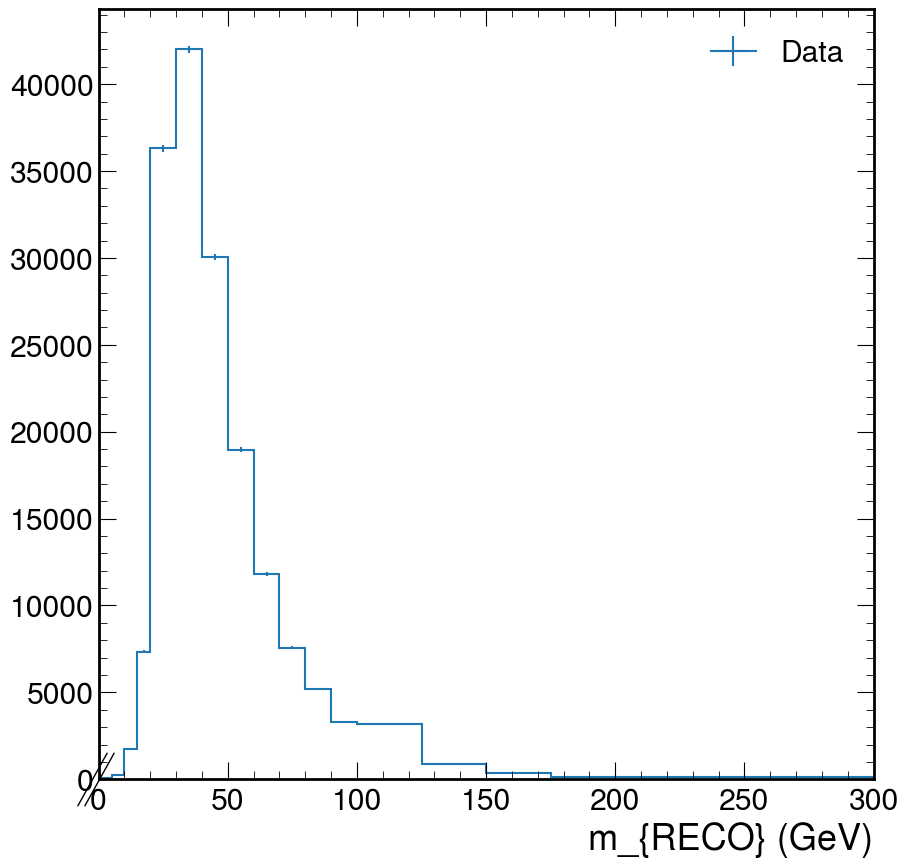

In [26]:
import matplotlib.pyplot as plt
#output['ptjet_mjet_u_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'MC')
output_data['ptjet_mjet_u_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'Data')
plt.legend()
plt.xlim(0,300)

(0.0, 200.0)

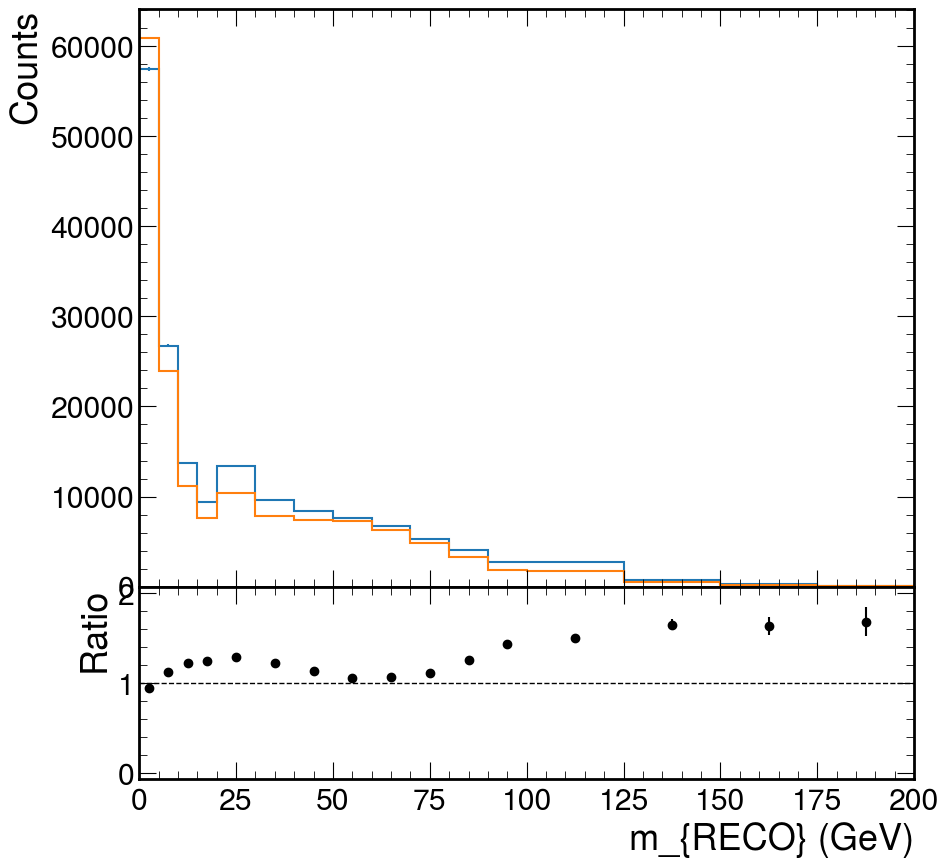

In [27]:
import mplhep as hep
import hist
# output['ptjet_mjet_u_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'MC', density = True)
# output_data['ptjet_mjet_u_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'Data', density = True)
output_data['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("mreco").plot_ratio(output['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("mreco"))

plt.xlim(0,200)


In [28]:
print(output_data['ptjet_mjet_u_reco'][{'systematic':'nominal'}].project("mreco").sum())
print(output['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("mreco").sum())

WeightedSum(value=169180, variance=169180)
WeightedSum(value=155338, variance=49373.7)


(0.0, 300.0)

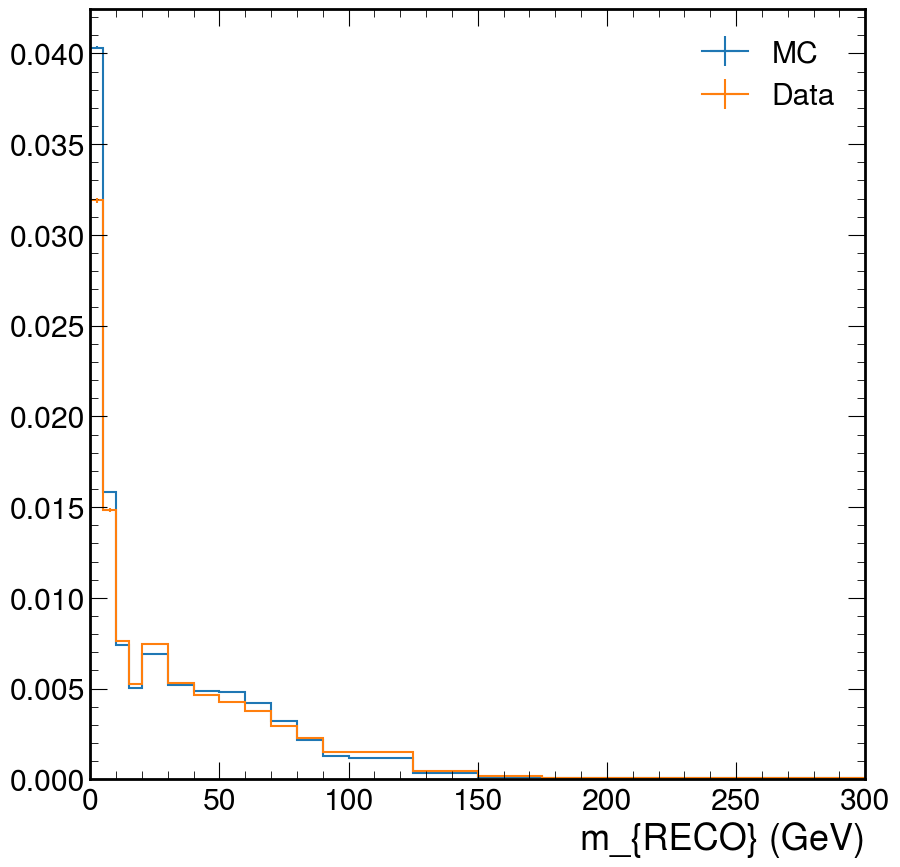

In [29]:
import matplotlib.pyplot as plt
output['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'MC', density = True)
output_data['ptjet_mjet_g_reco'][{'systematic':'nominal'}].project("mreco").plot(label = 'Data', density = True)
plt.legend()
plt.xlim(0,300)

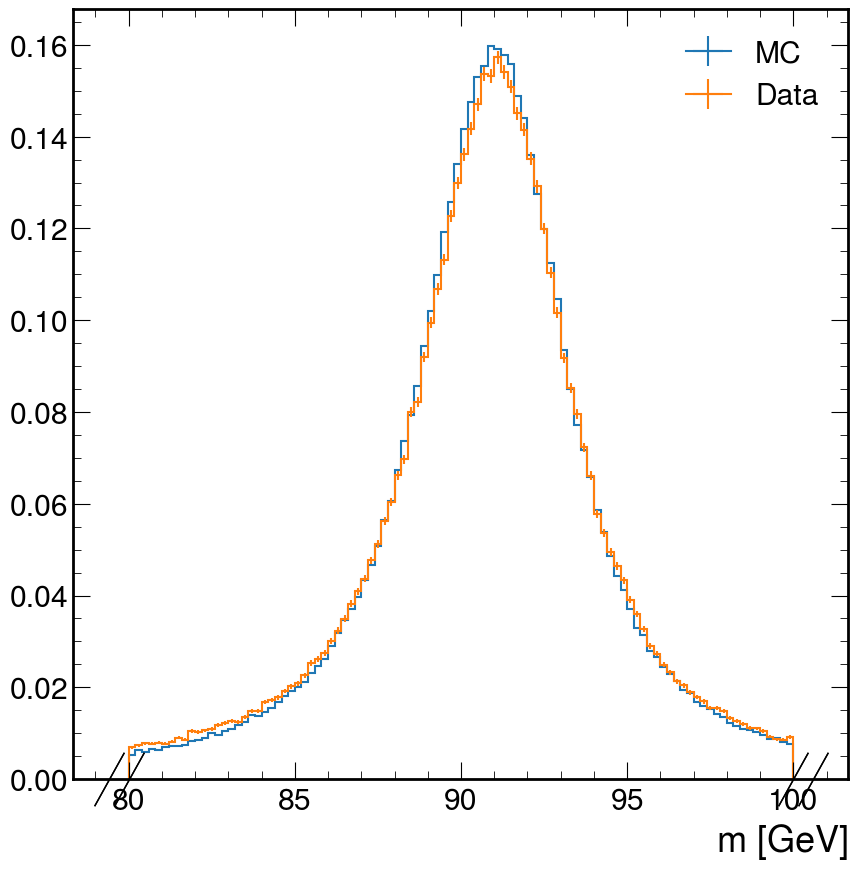

In [30]:
output['mz_reco'].project("mass").plot(label = 'MC', density = True)
output_data['mz_reco'].project("mass").plot(label = 'Data', density = True)
plt.legend()

/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/tmp/ipykernel_74/3213442505.py:27: RuntimeWarning: invalid value encountered in divide
  hup_ratio = up/nom
/tmp/ipykernel_74/3213442505.py:28: RuntimeWarning: invalid value encountered in divide
  hdown_ratio = down/nom


Text(0, 1, '$\\frac{variation}{nominal}$')

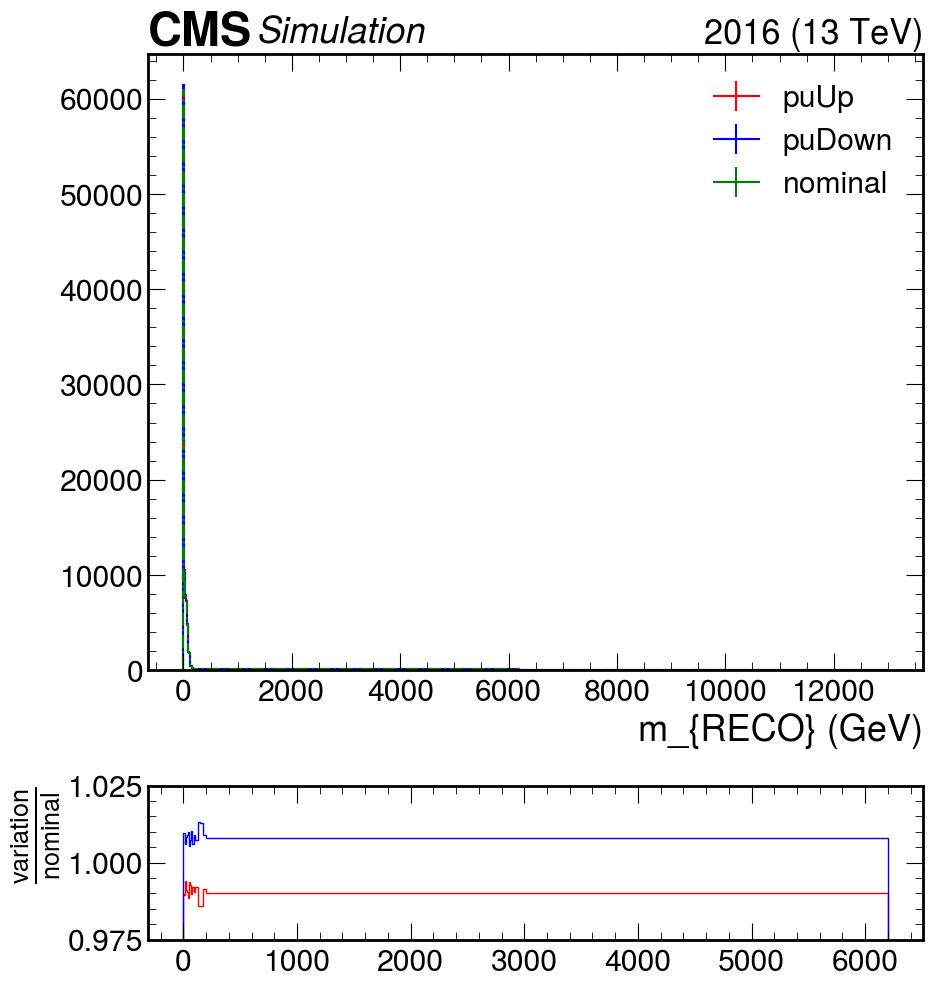

In [45]:
scale = 1
fig = plt.figure(figsize = (10*scale,11.5*scale))
gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)

ax = plt.subplot(gs[0])

h = output['response_matrix_g'].project("systematic","mreco")
filtered_hist_nom = h[["nominal"], :]
filtered_hist_up = h[["puUp"], :]
filtered_hist_down = h[["puDown"], :]


filtered_hist_up.plot(color = "r")
filtered_hist_down.plot(color = "b")
filtered_hist_nom.plot(color = "g", ls = "-.")
plt.legend()
hep.cms.label(year = 2016)


ax2 = plt.subplot(gs[1])

h = output['response_matrix_g'].project("systematic","mreco")
nom = h[[ "nominal"], :].values()[0]
up = h[[ "puUp"], :].values()[0]
down = h[[ "puDown"], :].values()[0]
ratio_axis = h[[ "nominal"],:].axes[1].edges
hup_ratio = up/nom
hdown_ratio = down/nom

plt.ylim(0.975,1.025)
plt.stairs( hup_ratio,ratio_axis, label = "up", color = "r")
plt.stairs( hdown_ratio, ratio_axis, label = "down", color = "b")
plt.ylabel(r"$\frac{variation}{nominal}$")
#plt.legend(fontsize = 15, loc = (1.04,0.5))


In [61]:
def plot_updown(systematic = "pu", hists =  output, ylim = 0.025 , variable = "mreco", year = "2016"):
    scale = 1
    fig = plt.figure(figsize = (10*scale,11.5*scale))
    gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)
    
    ax = plt.subplot(gs[0])
    
    h = output['response_matrix_g'].project("systematic",variable)
    

    filtered_hist_nom = h[["nominal"], :]
    filtered_hist_up = h[[systematic+"Up"], :]
    filtered_hist_down = h[[systematic+"Down"], :]
    
    filtered_hist_up.plot(color = "r")
    filtered_hist_down.plot(color = "b")
    filtered_hist_nom.plot(color = "g", ls = "-.")

    
    plt.xlim(-20,200)
    plt.ylabel("Event weights")
    plt.xlabel(r"${}$".format(filtered_hist_nom.axes[1].label))
    plt.legend()
    hep.cms.label(year = year)

    
    ax2 = plt.subplot(gs[1])
    
    h = output['response_matrix_g'].project("systematic","mreco")
    nom = h[[ "nominal"], :].values()[0]
    up = h[[ systematic+"Up"], :].values()[0]
    down = h[[ systematic+"Down"], :].values()[0]
    ratio_axis = h[[ "nominal"],:].axes[1].edges
    hup_ratio = up/nom
    hdown_ratio = down/nom

    plt.xlim(-20,200)
    plt.ylim(1+ylim, 1- ylim)
    plt.stairs( hup_ratio,ratio_axis, label = "up", color = "r")
    plt.stairs( hdown_ratio, ratio_axis, label = "down", color = "b")
    plt.hlines(1, -20, 1000, color = "black")
    plt.ylabel(r"$\frac{variation}{nominal}$")
    
    plt.savefig("plots/{}/jet_syst/{}_{}_{}.png".format(year, year, variable, systematic))


In [62]:
# def plot_updown_jets(systematic = "pu", hists =  output, ylim = 0.025 ):
#     scale = 1
#     fig = plt.figure(figsize = (10*scale,11.5*scale))
#     gs = gridspec.GridSpec(nrows=2, ncols= 1, height_ratios=[4, 1], hspace = 0.3)
    
#     ax = plt.subplot(gs[0])
    
#     h = output['response_matrix_u'].project("systematic","mreco")
#     filtered_hist = h[["nominal", systematic+"_up",systematic+"_down"], :]
#     filtered_hist.plot()

#     plt.legend()
#     hep.cms.label(year = 2016)
#     ax2 = plt.subplot(gs[1])
    
#     h = output['response_matrix_u'].project("systematic","mreco")
#     nom = h[[ "nominal"], :].values()[0]
#     up = h[[ systematic+"_up"], :].values()[0]
#     down = h[[ systematic+"_down"], :].values()[0]
#     ratio_axis = h[[ "nominal"],:].axes[1].edges
#     hup_ratio = up/nom
#     hdown_ratio = down/nom
    
#     plt.ylim(1+ylim, 1- ylim)
#     plt.stairs( hup_ratio,ratio_axis, label = "up")
#     plt.stairs( hdown_ratio, ratio_axis, label = "down")

#     plt.legend(fontsize = 15, loc = (1.04,0.5))

In [63]:

def save_syst_plots( variable = "mreco" , year = "2018", systematics = ["pu"]):
    year_tag_dict = {"2016":"UL16NanoAODv9","2017":"UL17NanoAODv9", "2018": "UL17NanoAODv9"}
    
    with open("qjetmass_zjets_gen_{}_all_syst.pkl".format(year_tag_dict[year]), "rb") as f:
        output = pickle.load( f )
    for systematic in systematics:
        plot_updown(systematic = systematic, hists =  output, variable = variable,  ylim = 0.025, year = year)

In [64]:
syst_list = ['JER',
 'JES_AbsoluteMPFBias',
 'JES_AbsoluteScale',
 'JES_AbsoluteStat',
 'JES_FlavorQCD',
 'JES_Fragmentation',
 'JES_PileUpDataMC',
 'JES_PileUpPtBB',
 'JES_PileUpPtEC1',
 'JES_PileUpPtEC2',
 'JES_PileUpPtHF',
 'JES_PileUpPtRef',
 'JES_RelativeFSR',
 'JES_RelativeJEREC1',
 'JES_RelativeJEREC2',
 'JES_RelativeJERHF',
 'JES_RelativePtBB',
 'JES_RelativePtEC1',
 'JES_RelativePtEC2',
 'JES_RelativePtHF',
 'JES_RelativeBal',
 'JES_RelativeSample',
 'JES_RelativeStatEC',
 'JES_RelativeStatFSR',
 'JES_RelativeStatHF',
 'JES_SinglePionECAL',
 'JES_SinglePionHCAL',
 'JES_TimePtEta']

/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/tmp/ipykernel_74/3593609073.py:34: RuntimeWarning: invalid value encountered in divide
  hup_ratio = up/nom
/tmp/ipykernel_74/3593609073.py:35: RuntimeWarning: invalid value encountered in divide
  hdown_ratio = down/nom
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/tmp/ipykernel_74/3593609073.py:34: RuntimeWarning: invalid value encountered in divide
  hup_ratio = up/nom
/tmp/ipykernel_74/3593609073.py:35: RuntimeWarning: invalid value encountered in divide
  hdown_ratio = down/nom
/opt/conda/lib/python3.10/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed 

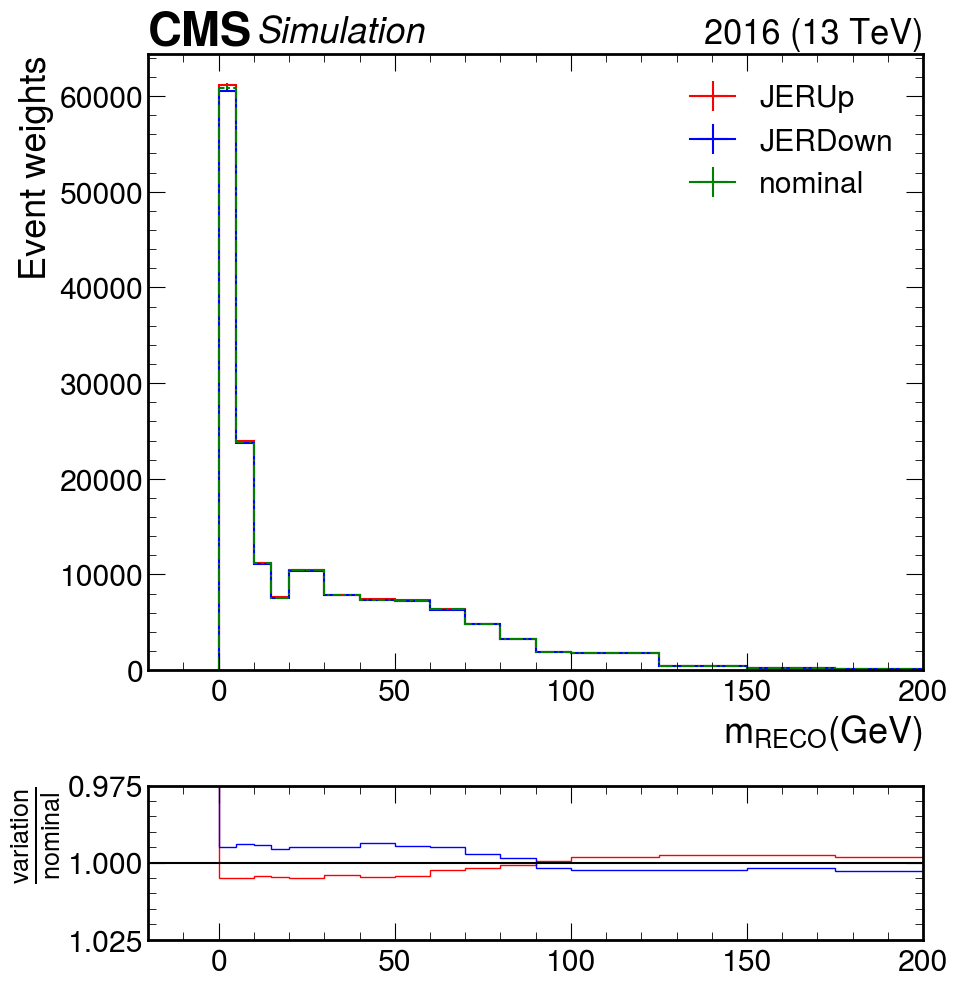

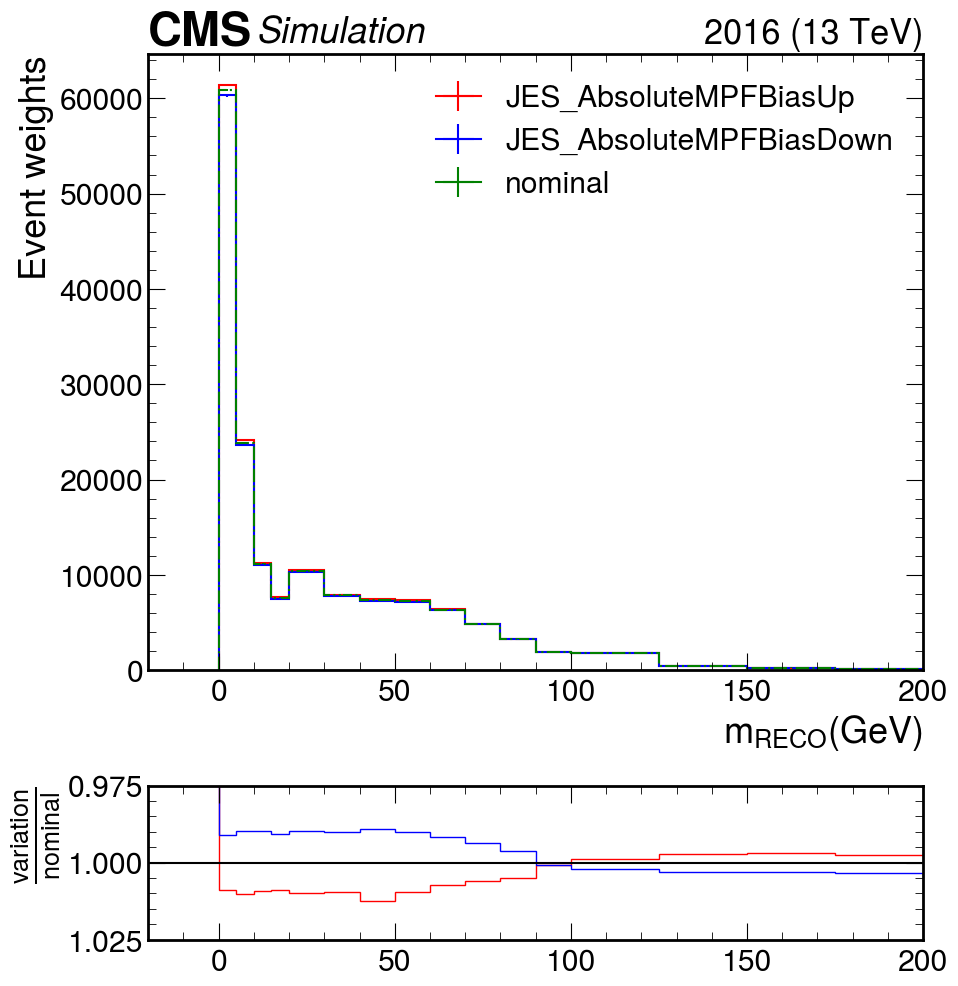

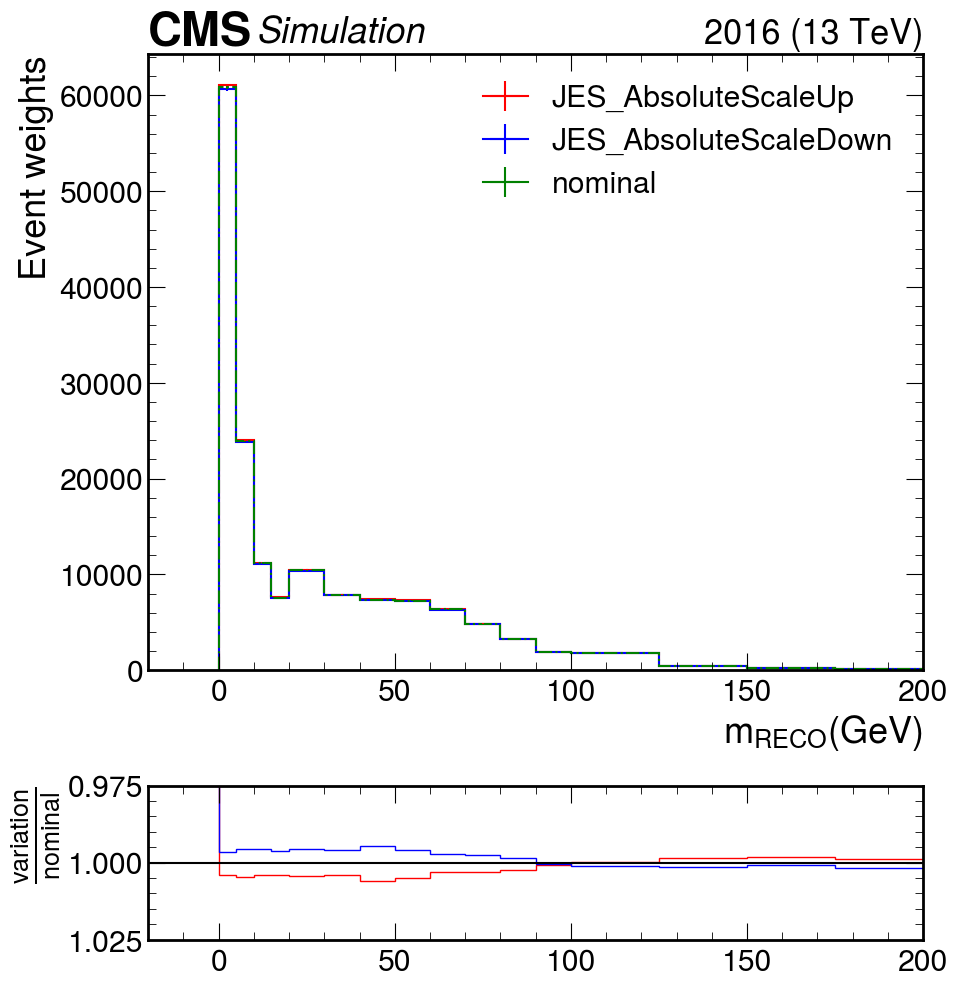

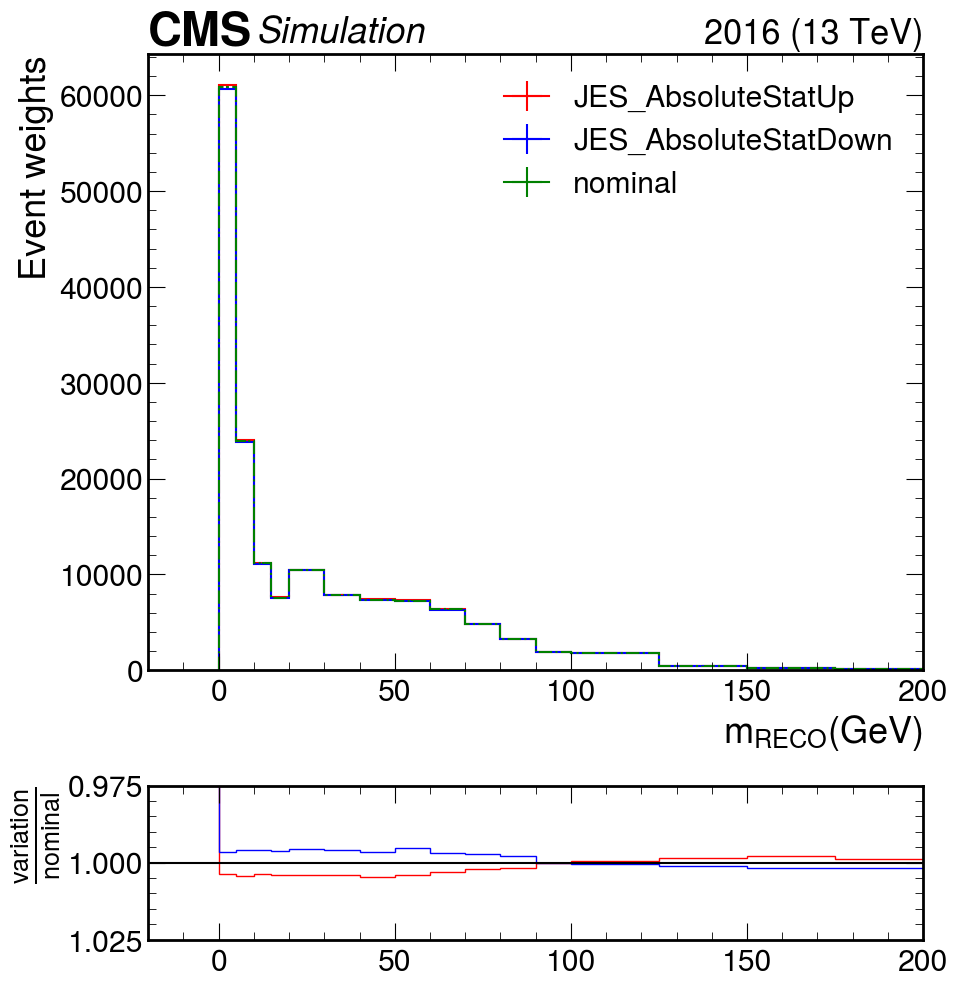

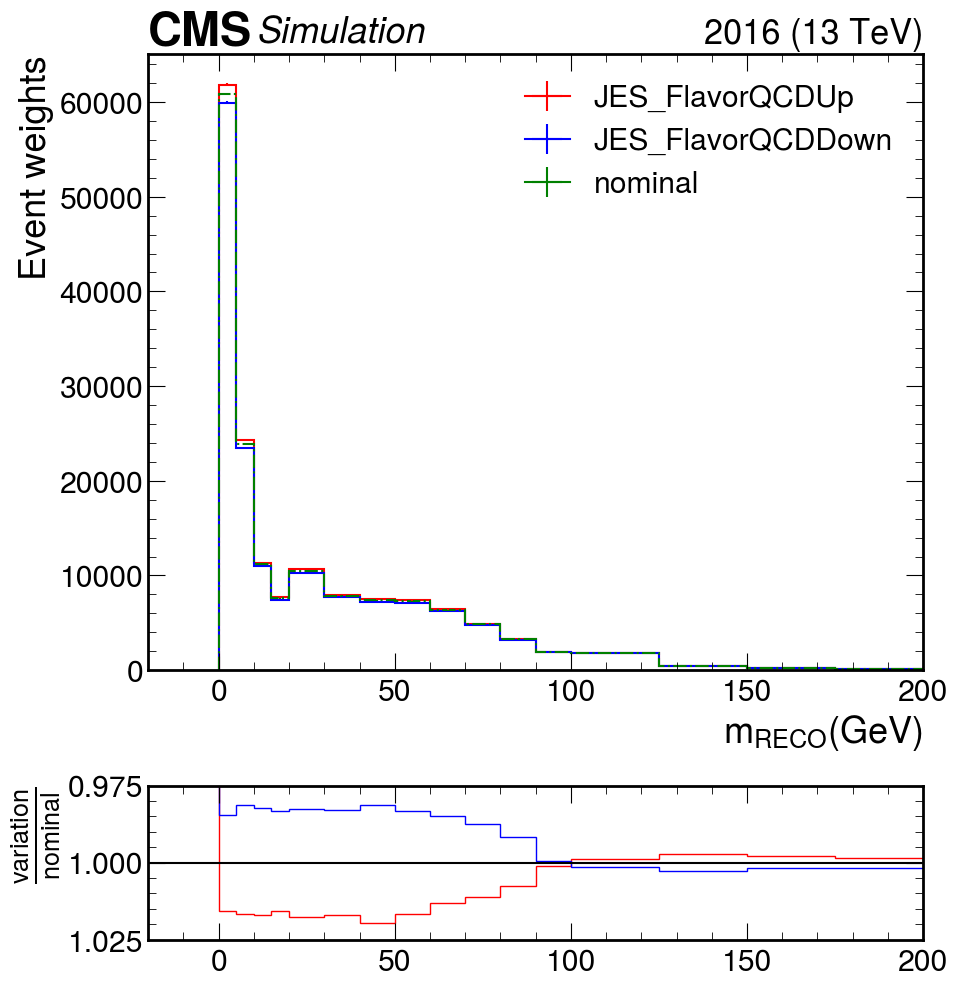

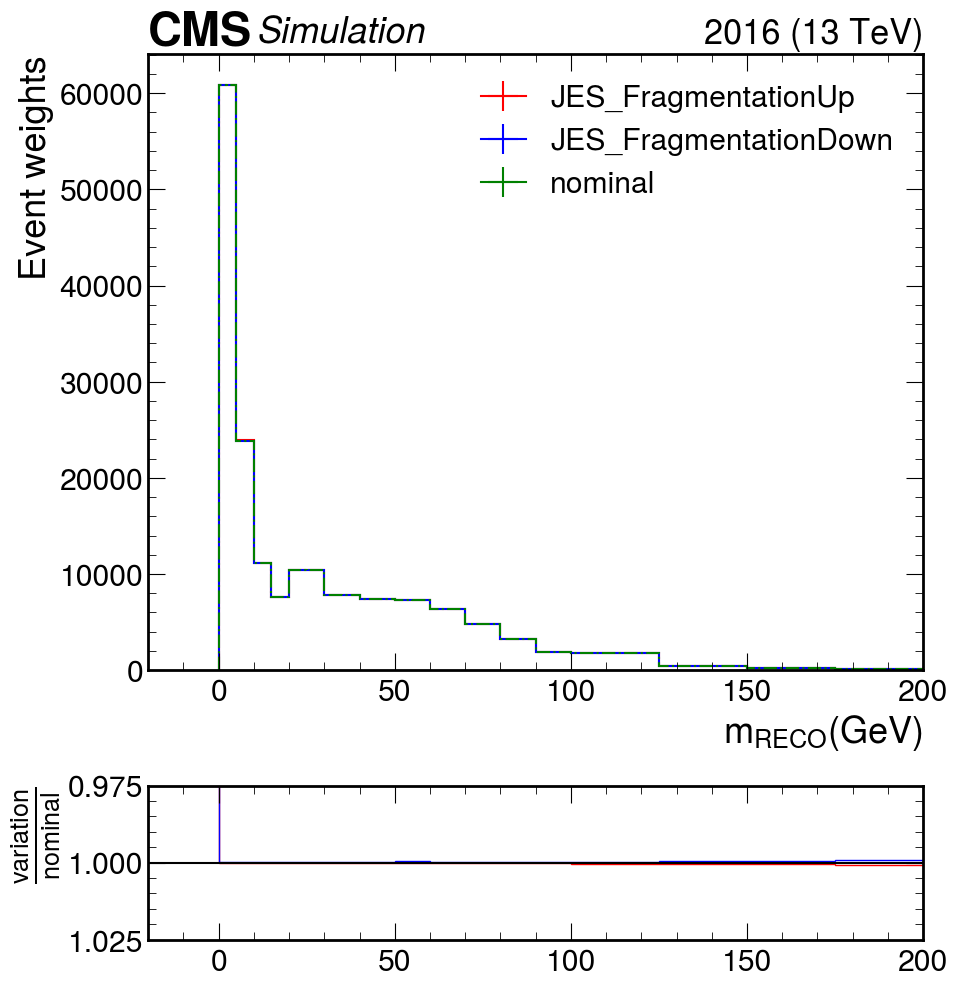

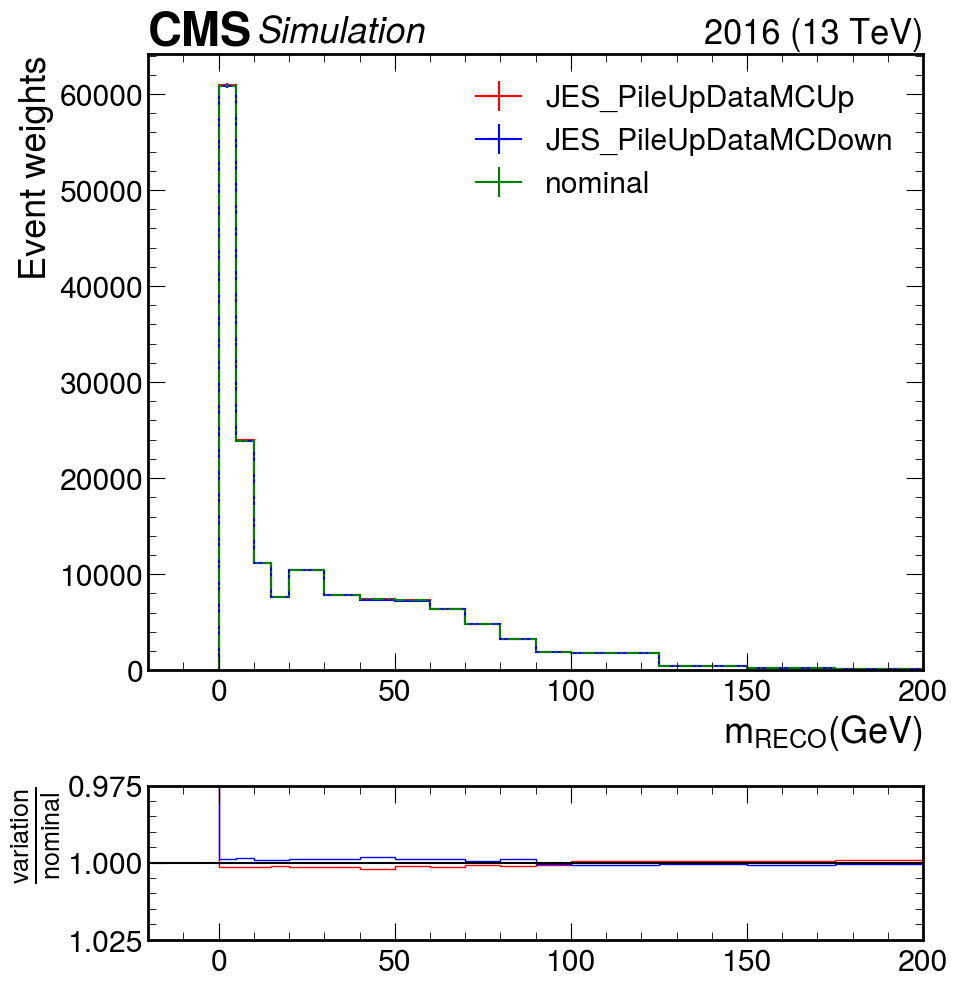

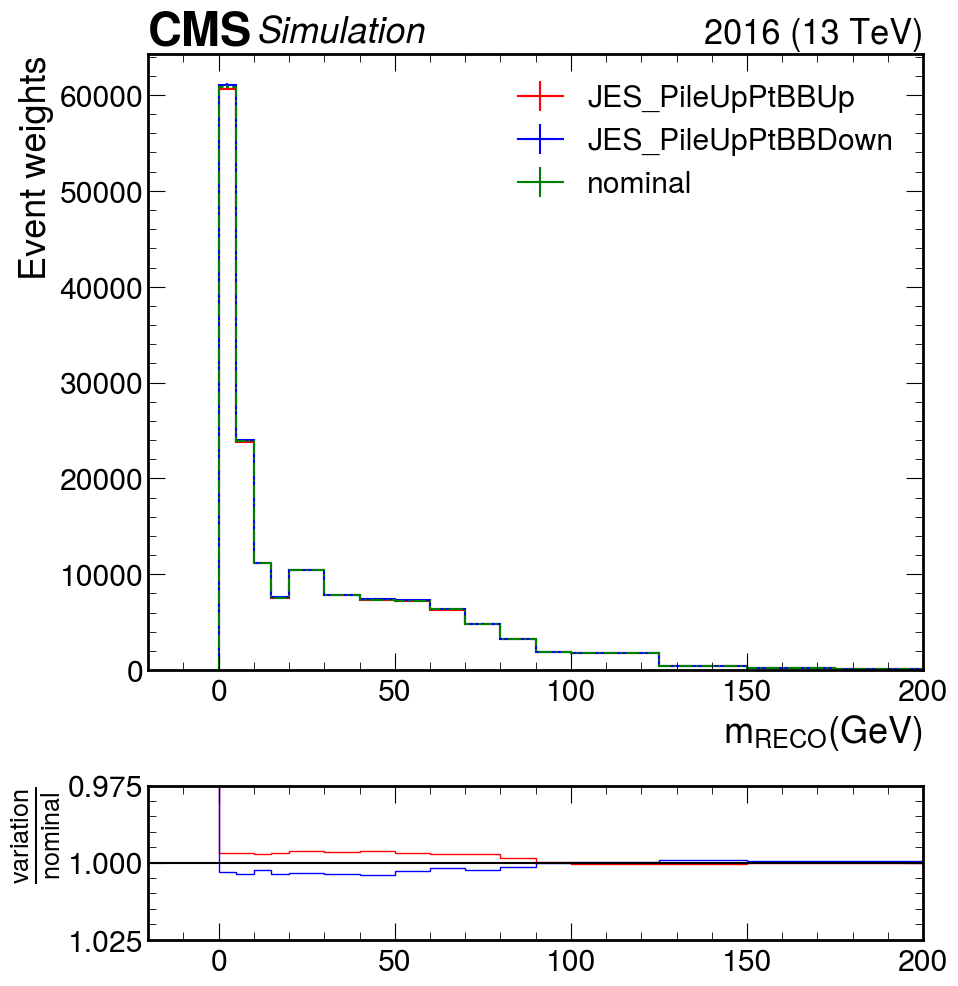

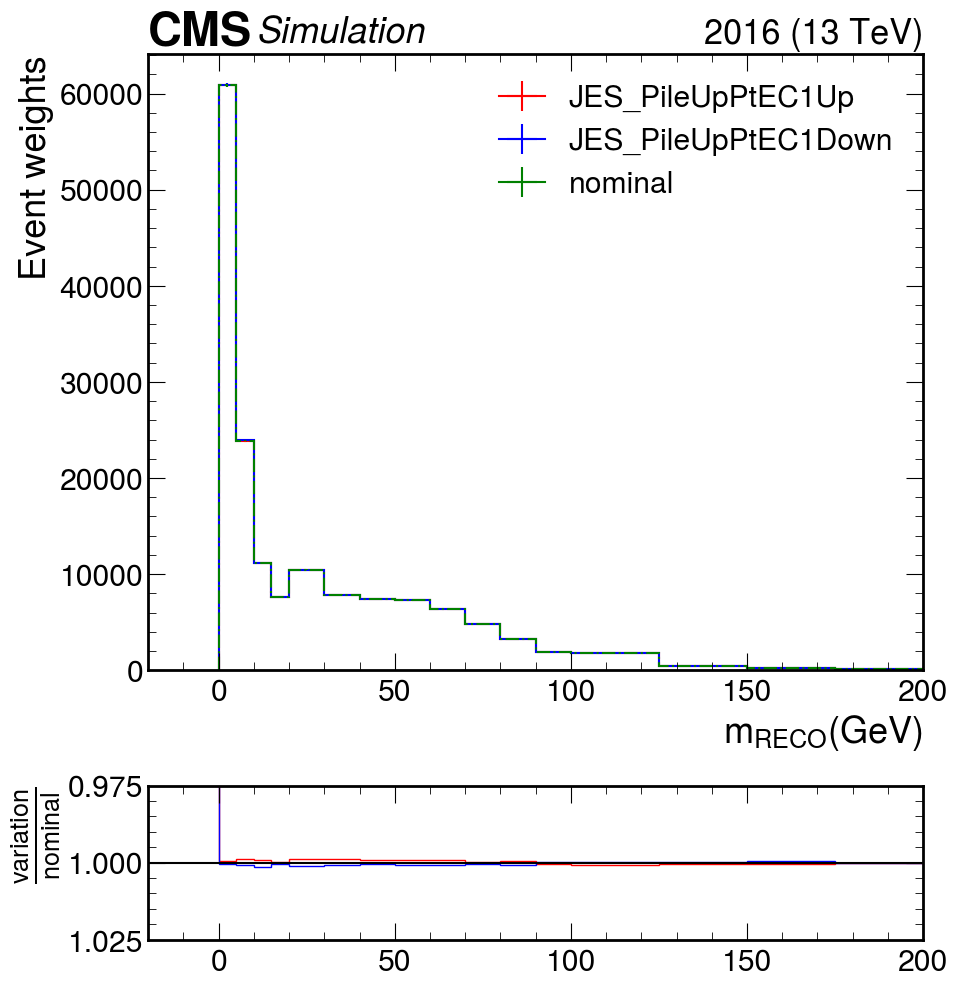

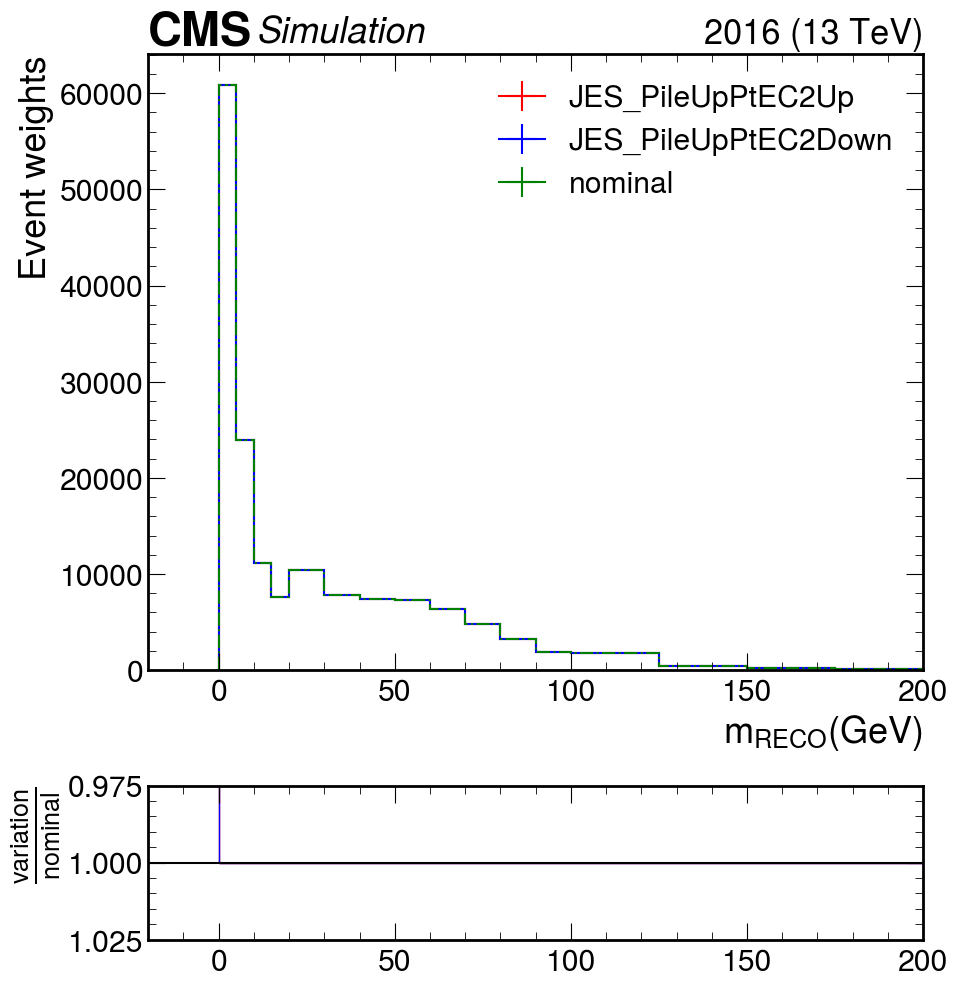

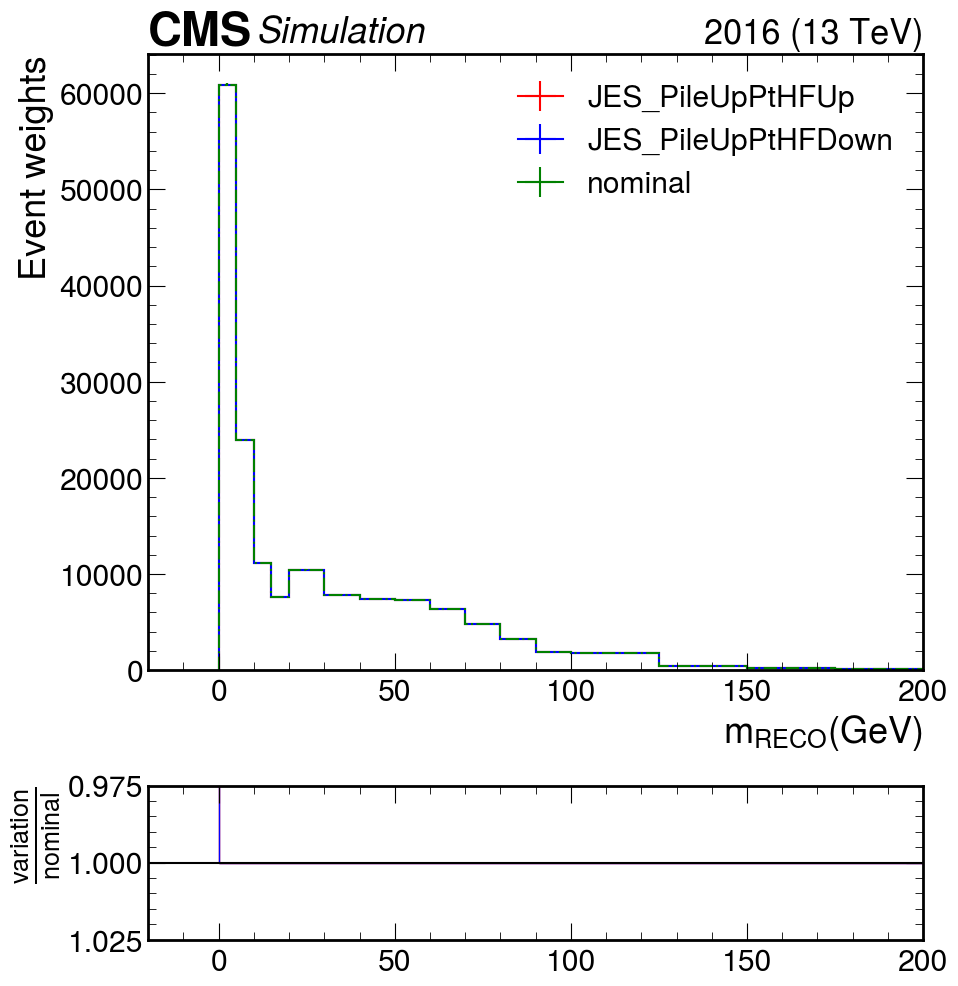

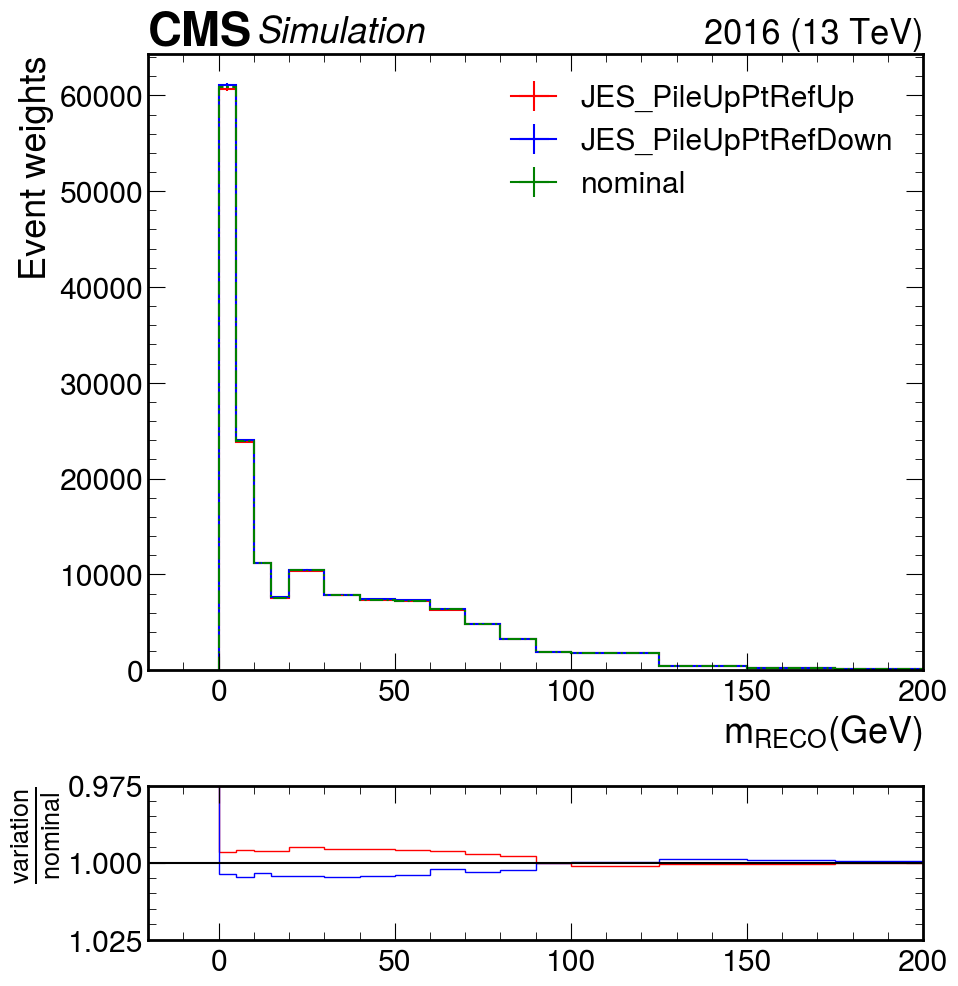

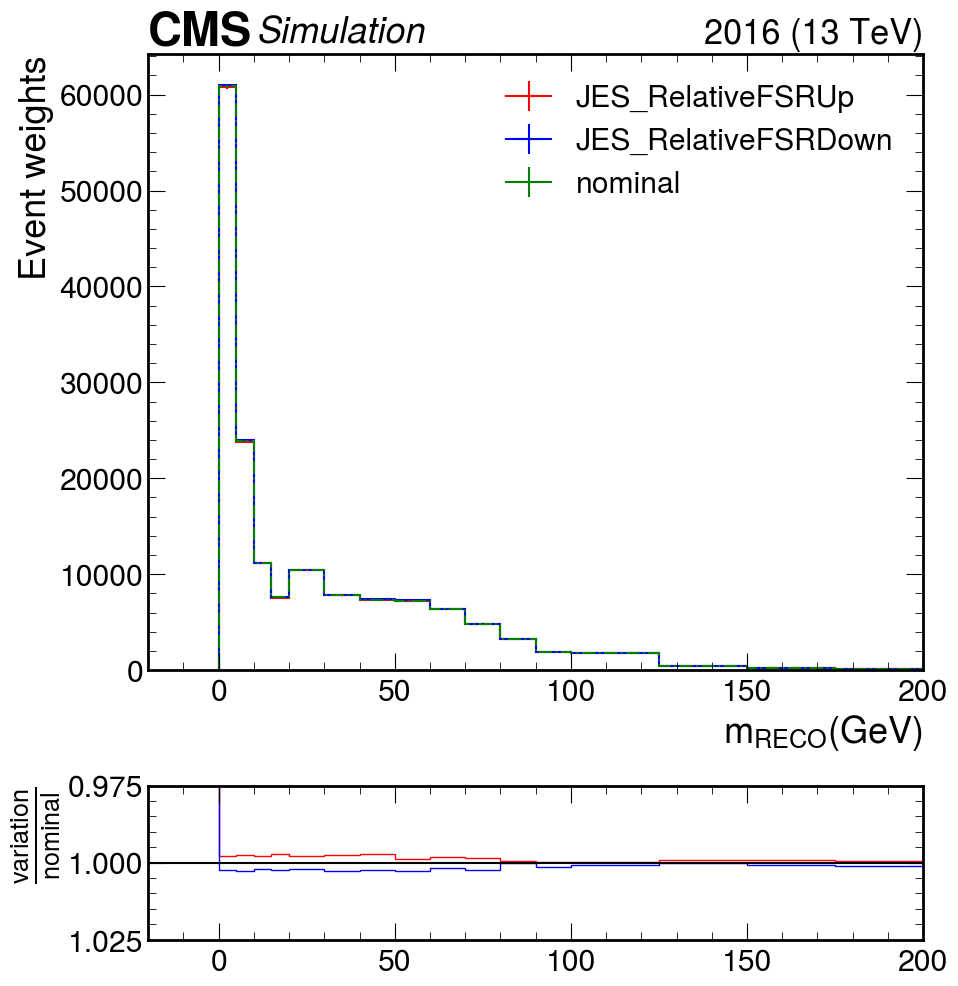

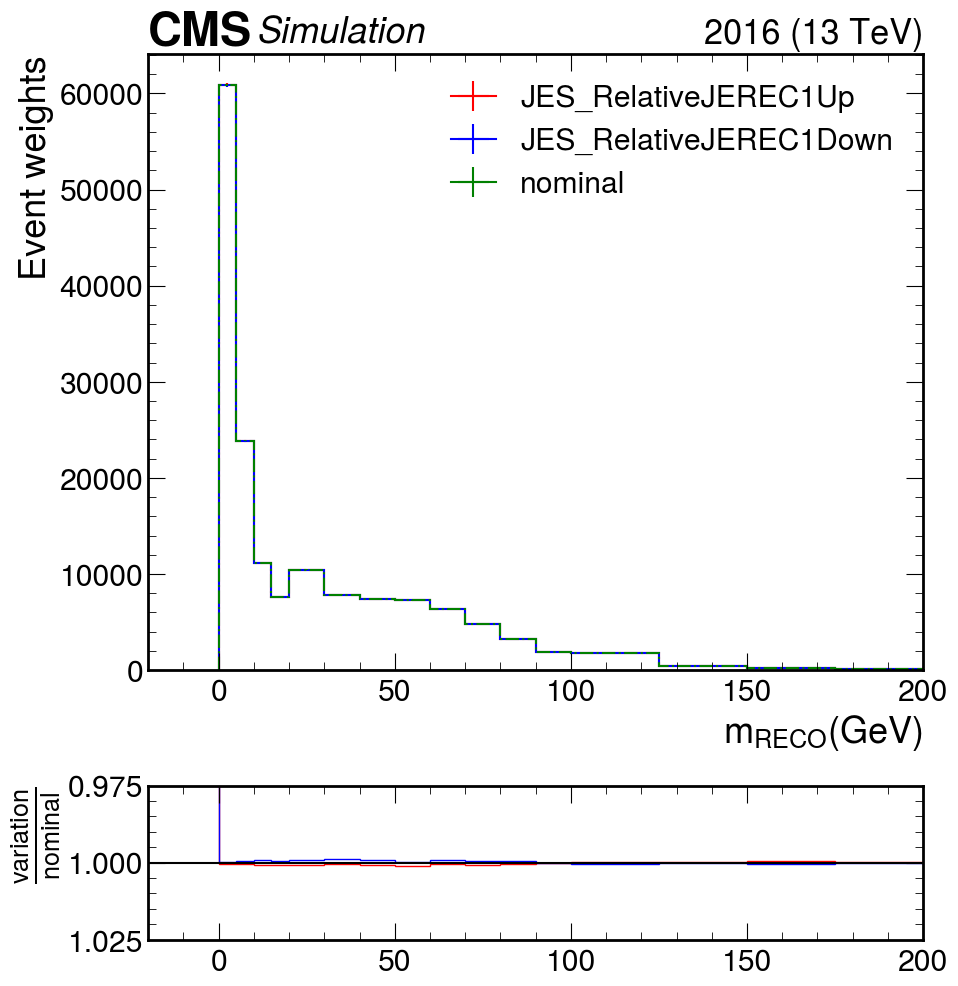

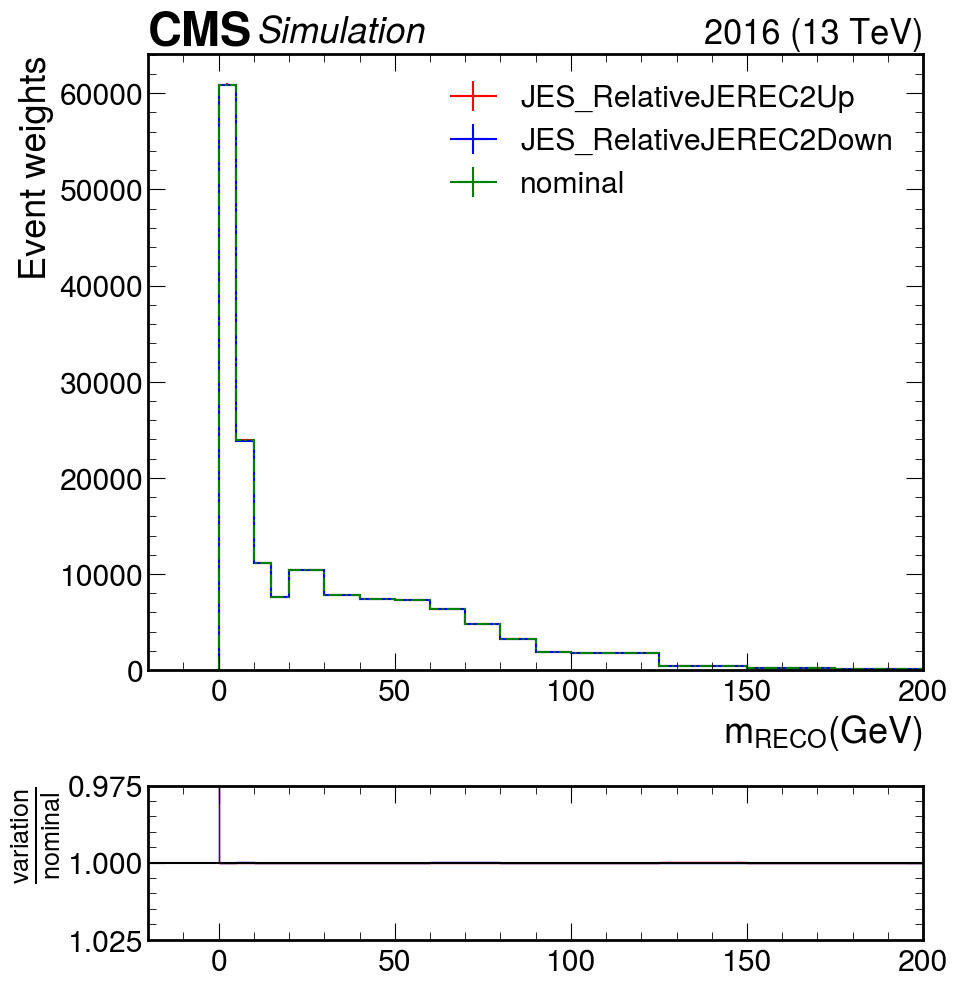

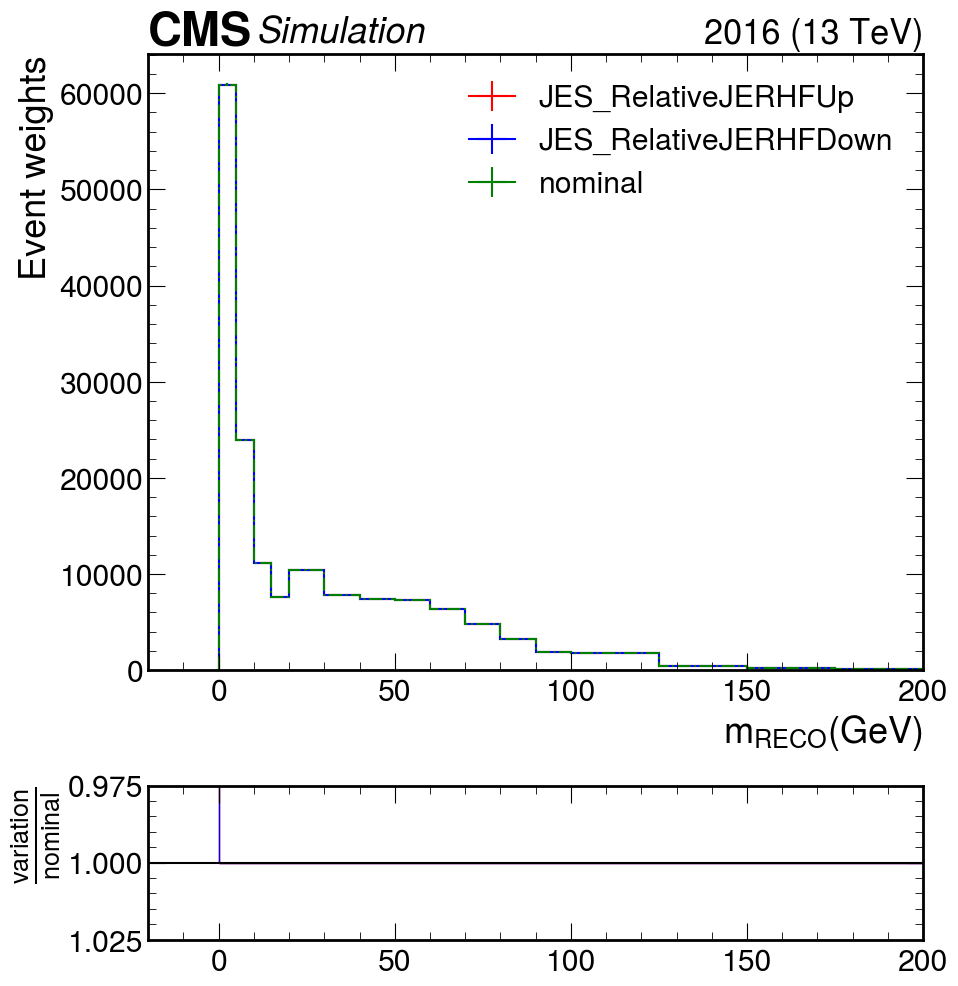

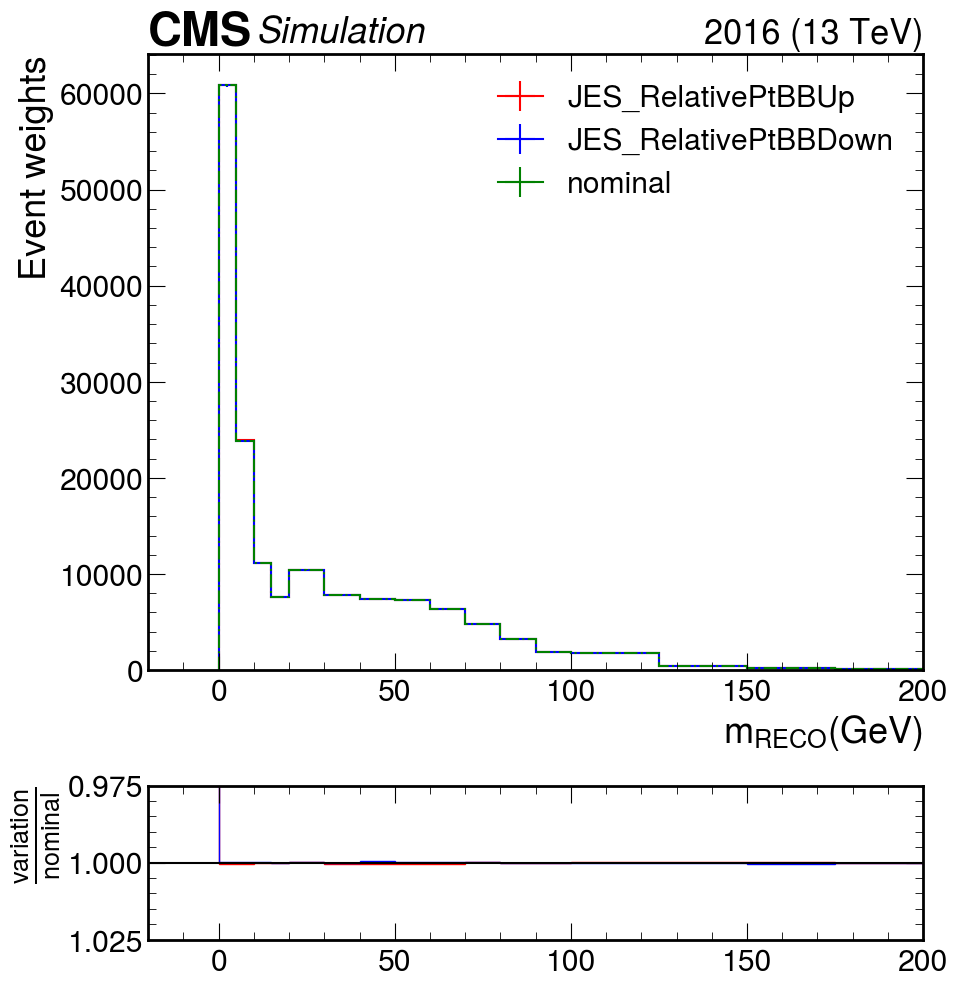

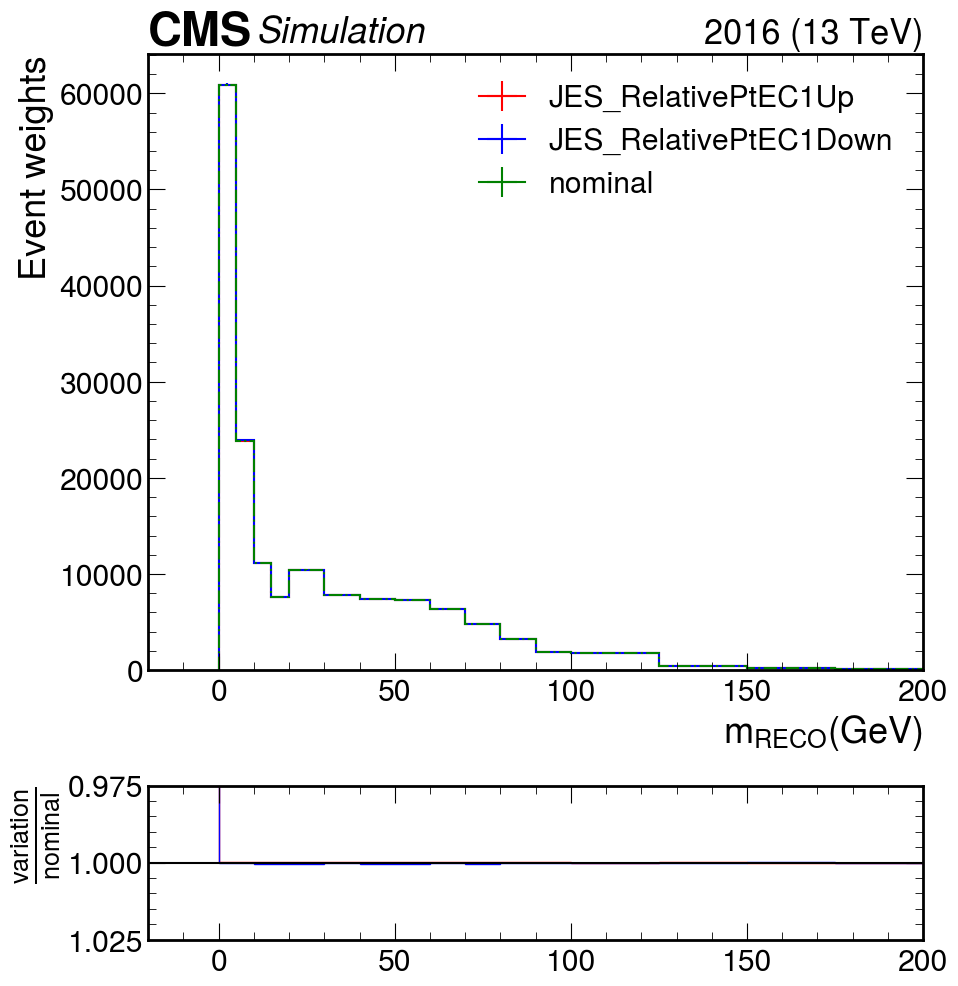

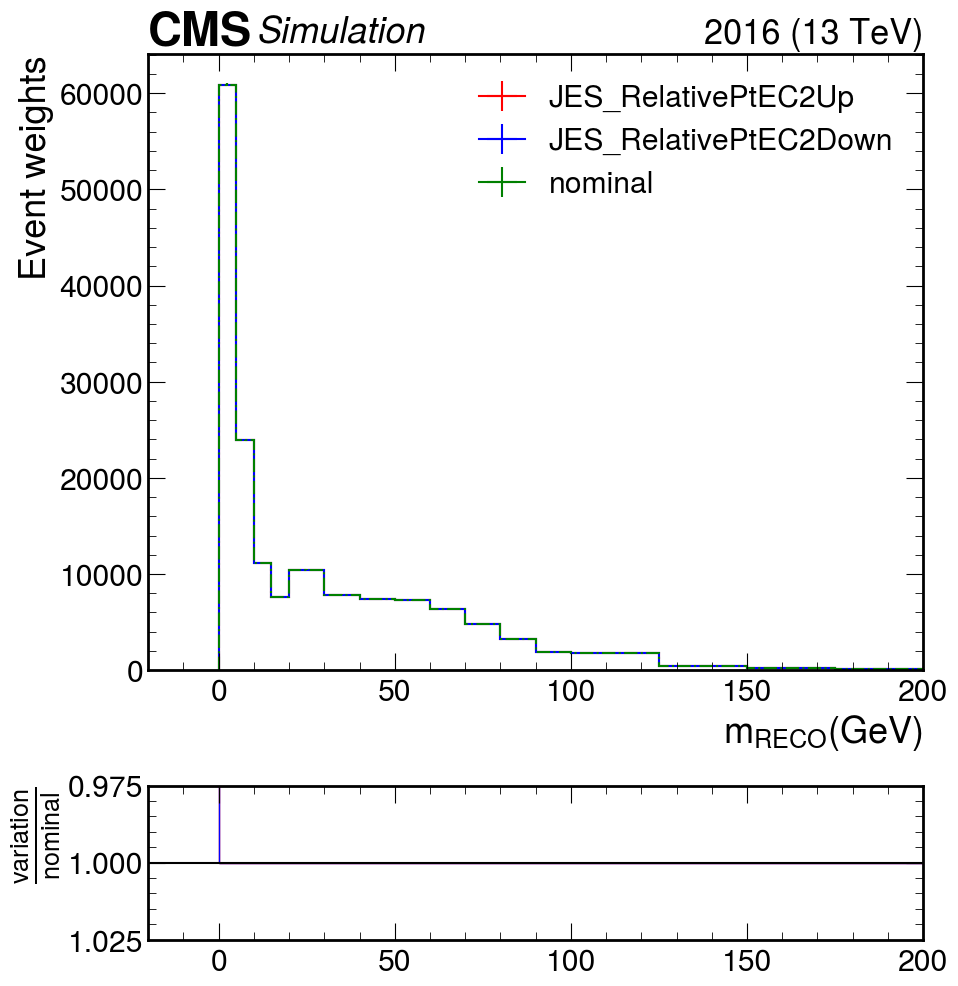

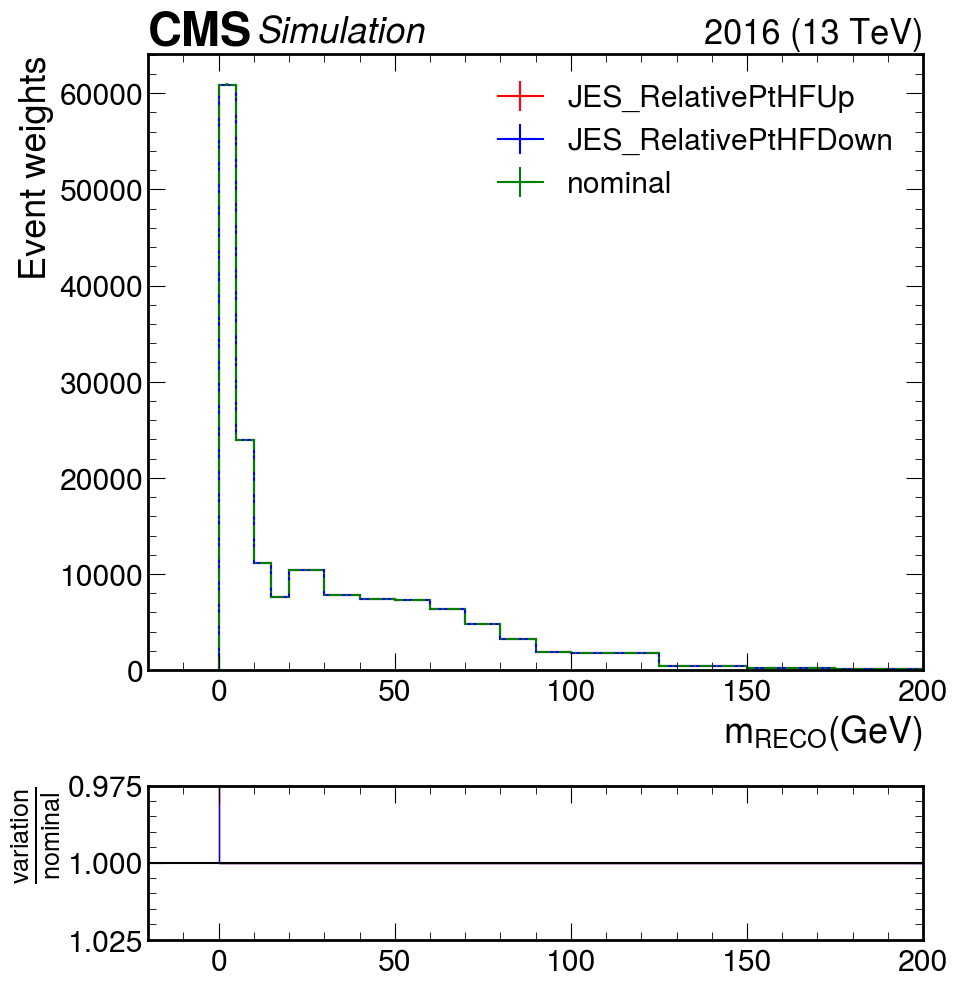

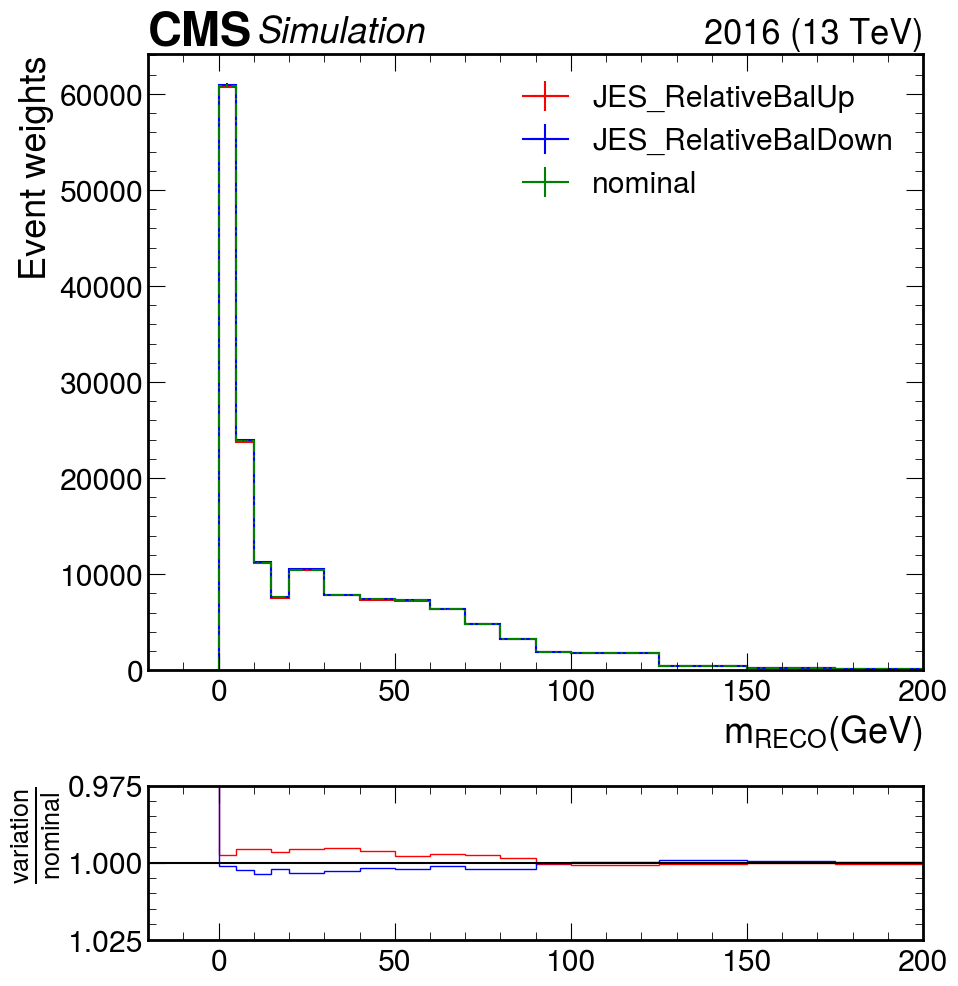

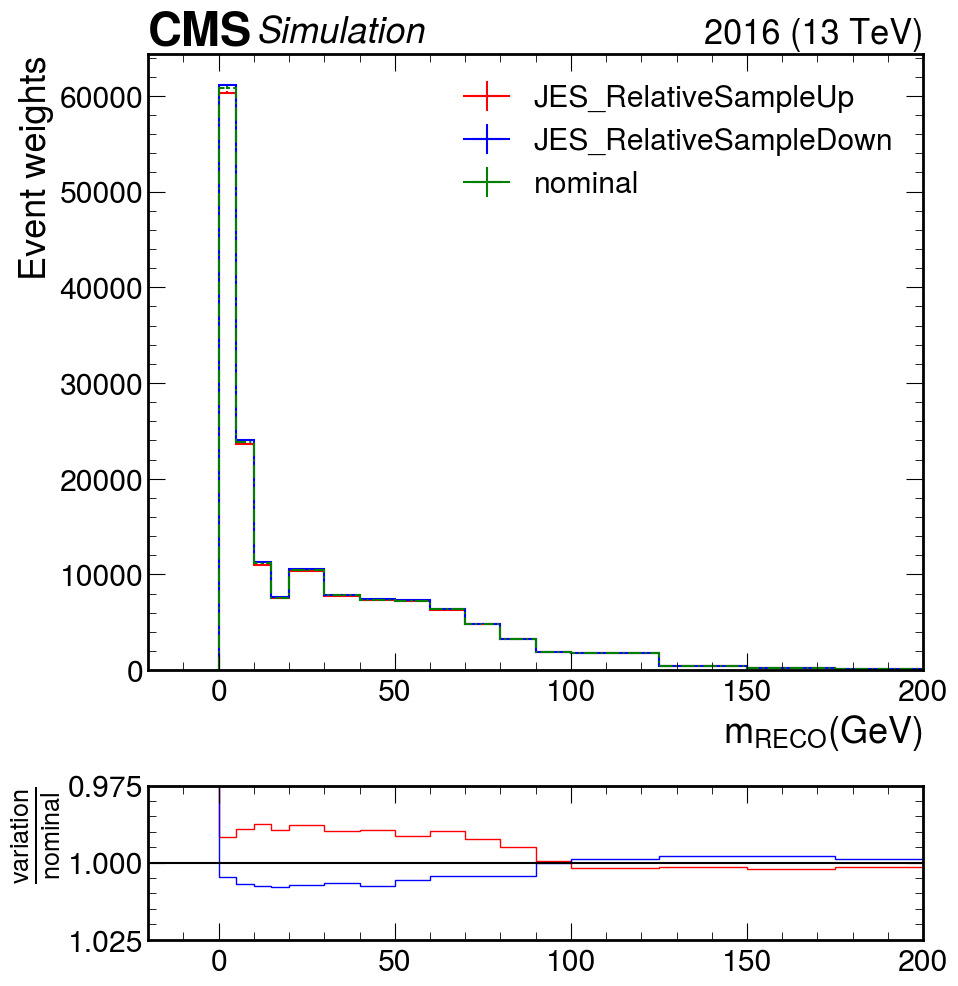

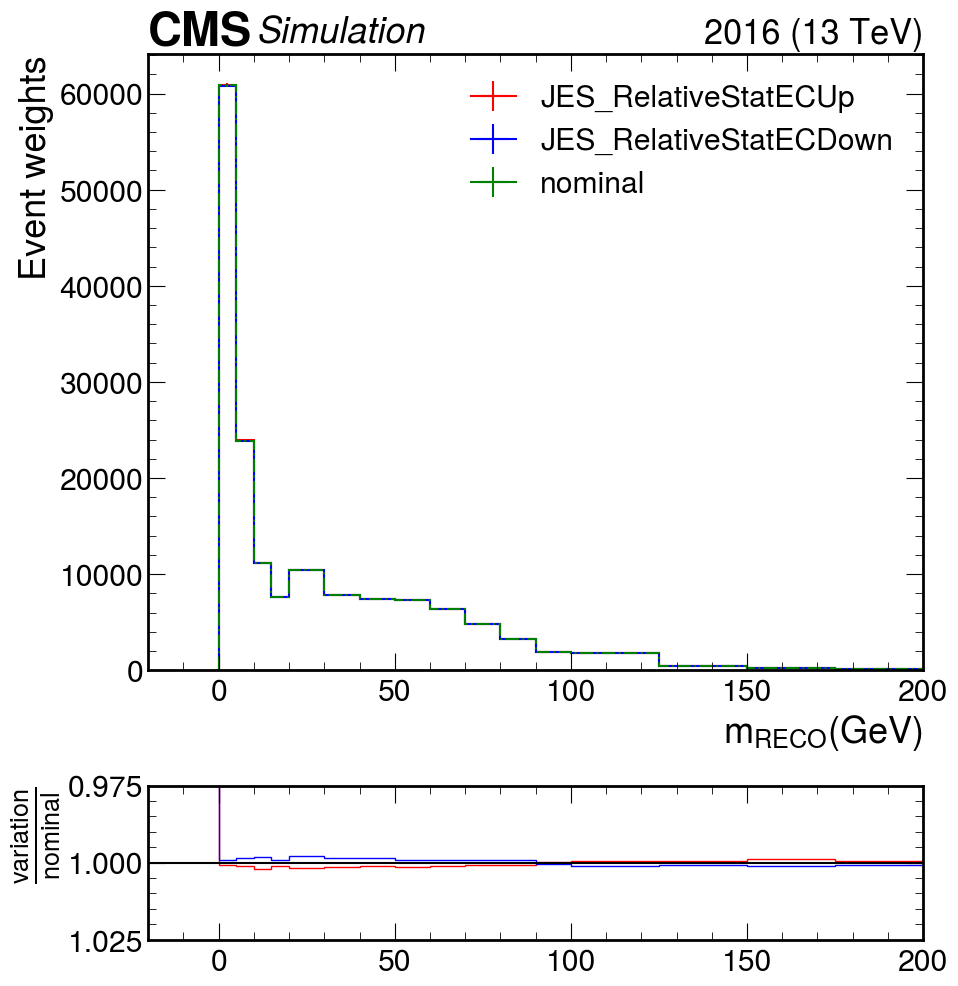

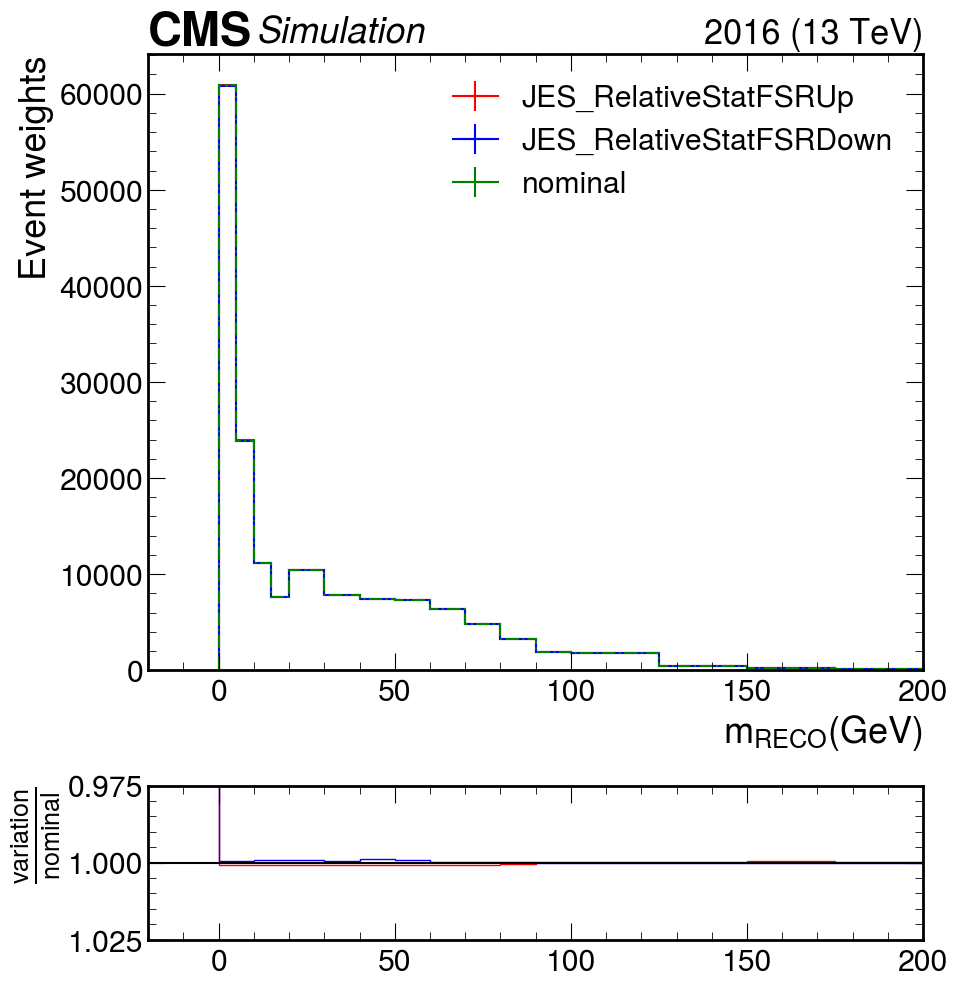

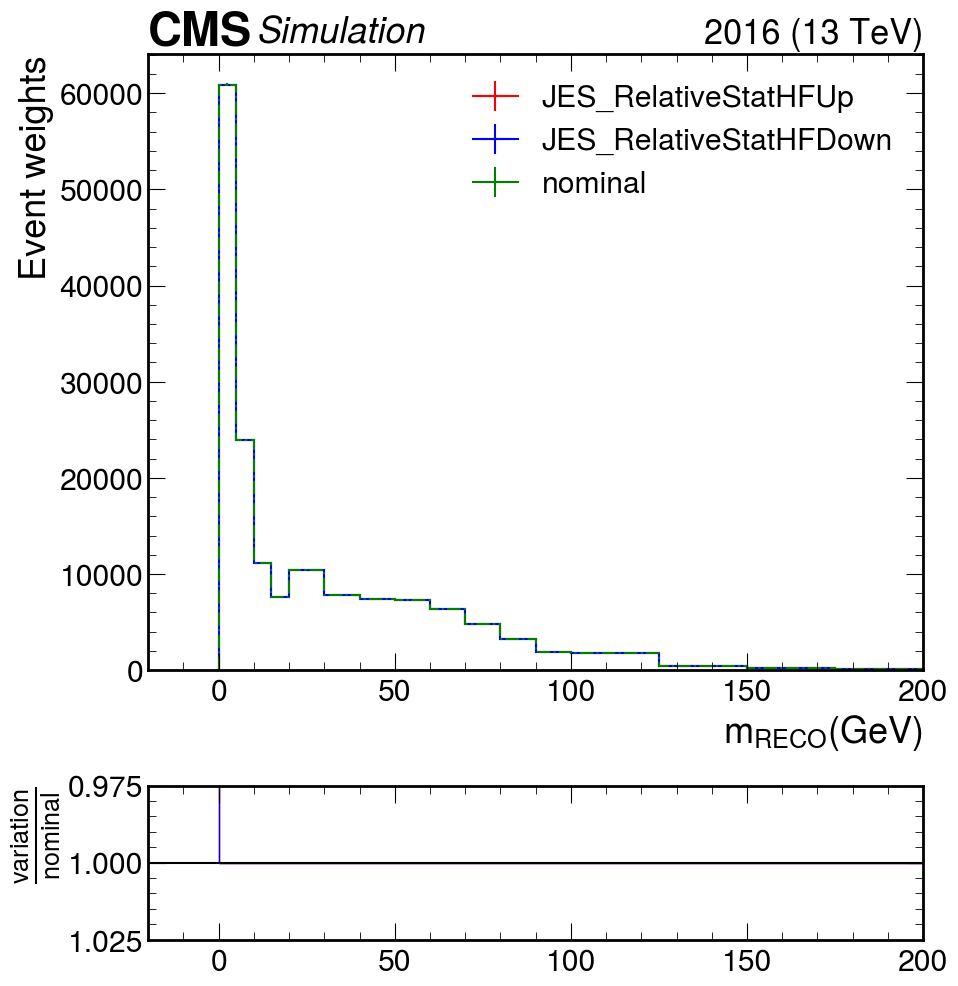

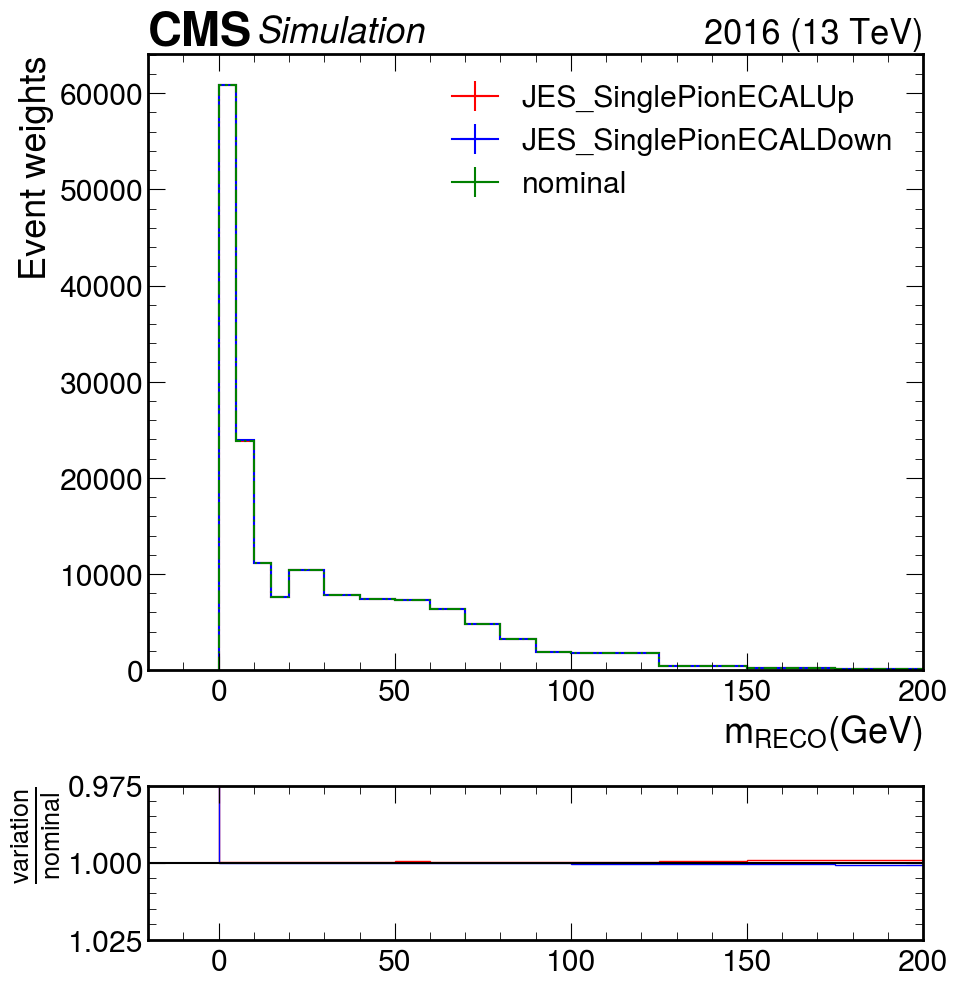

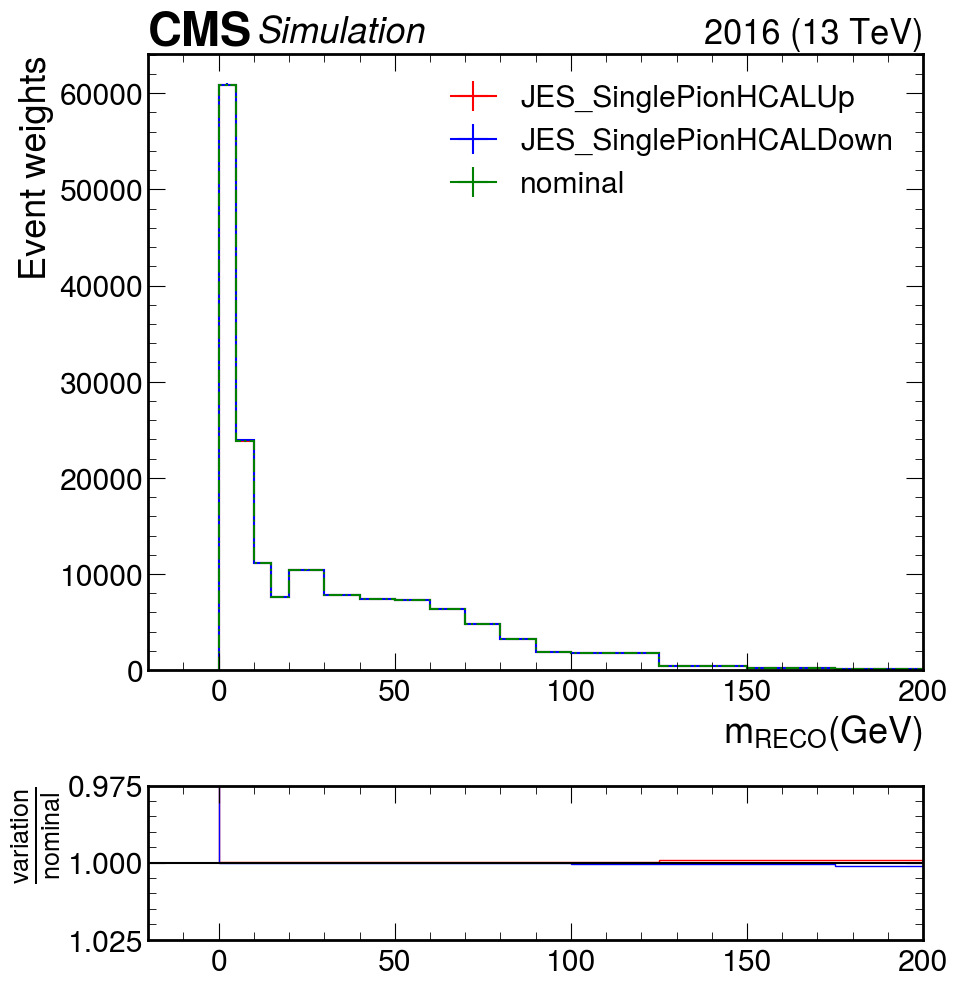

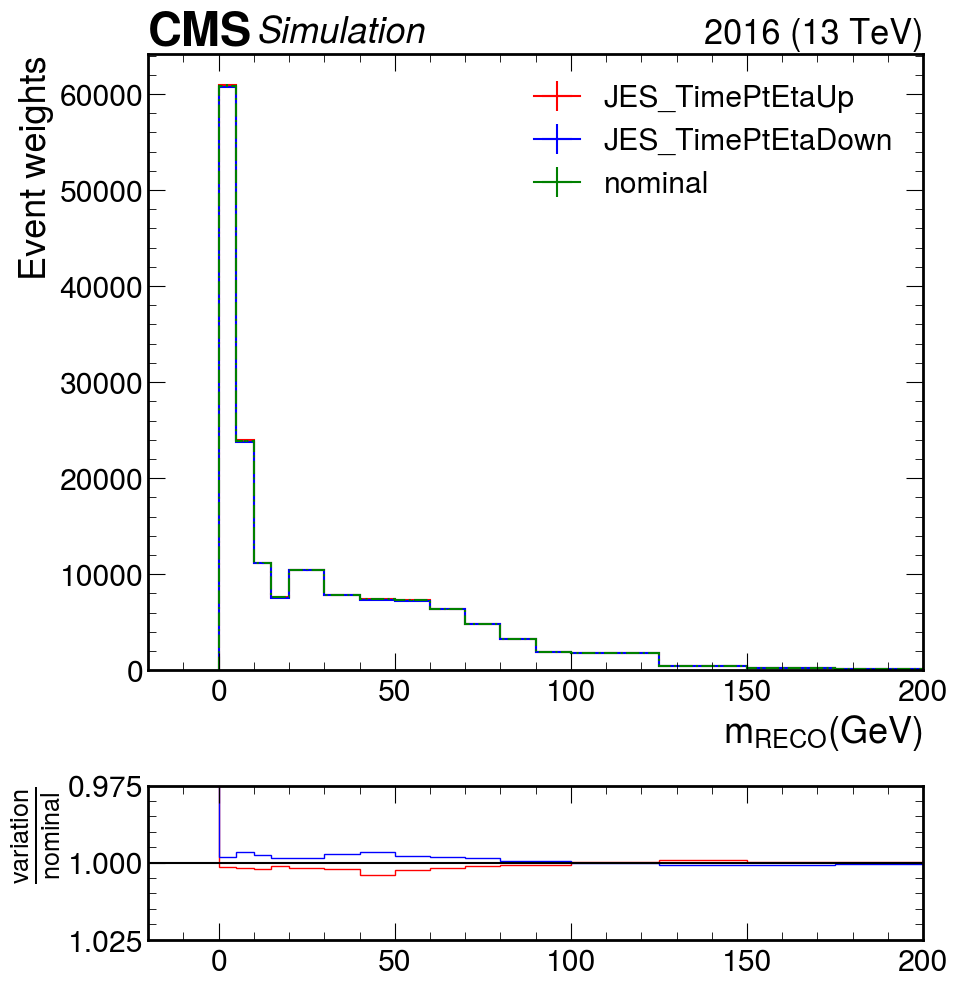

In [65]:
save_syst_plots(variable = "mreco" , year = "2016", systematics = syst_list)

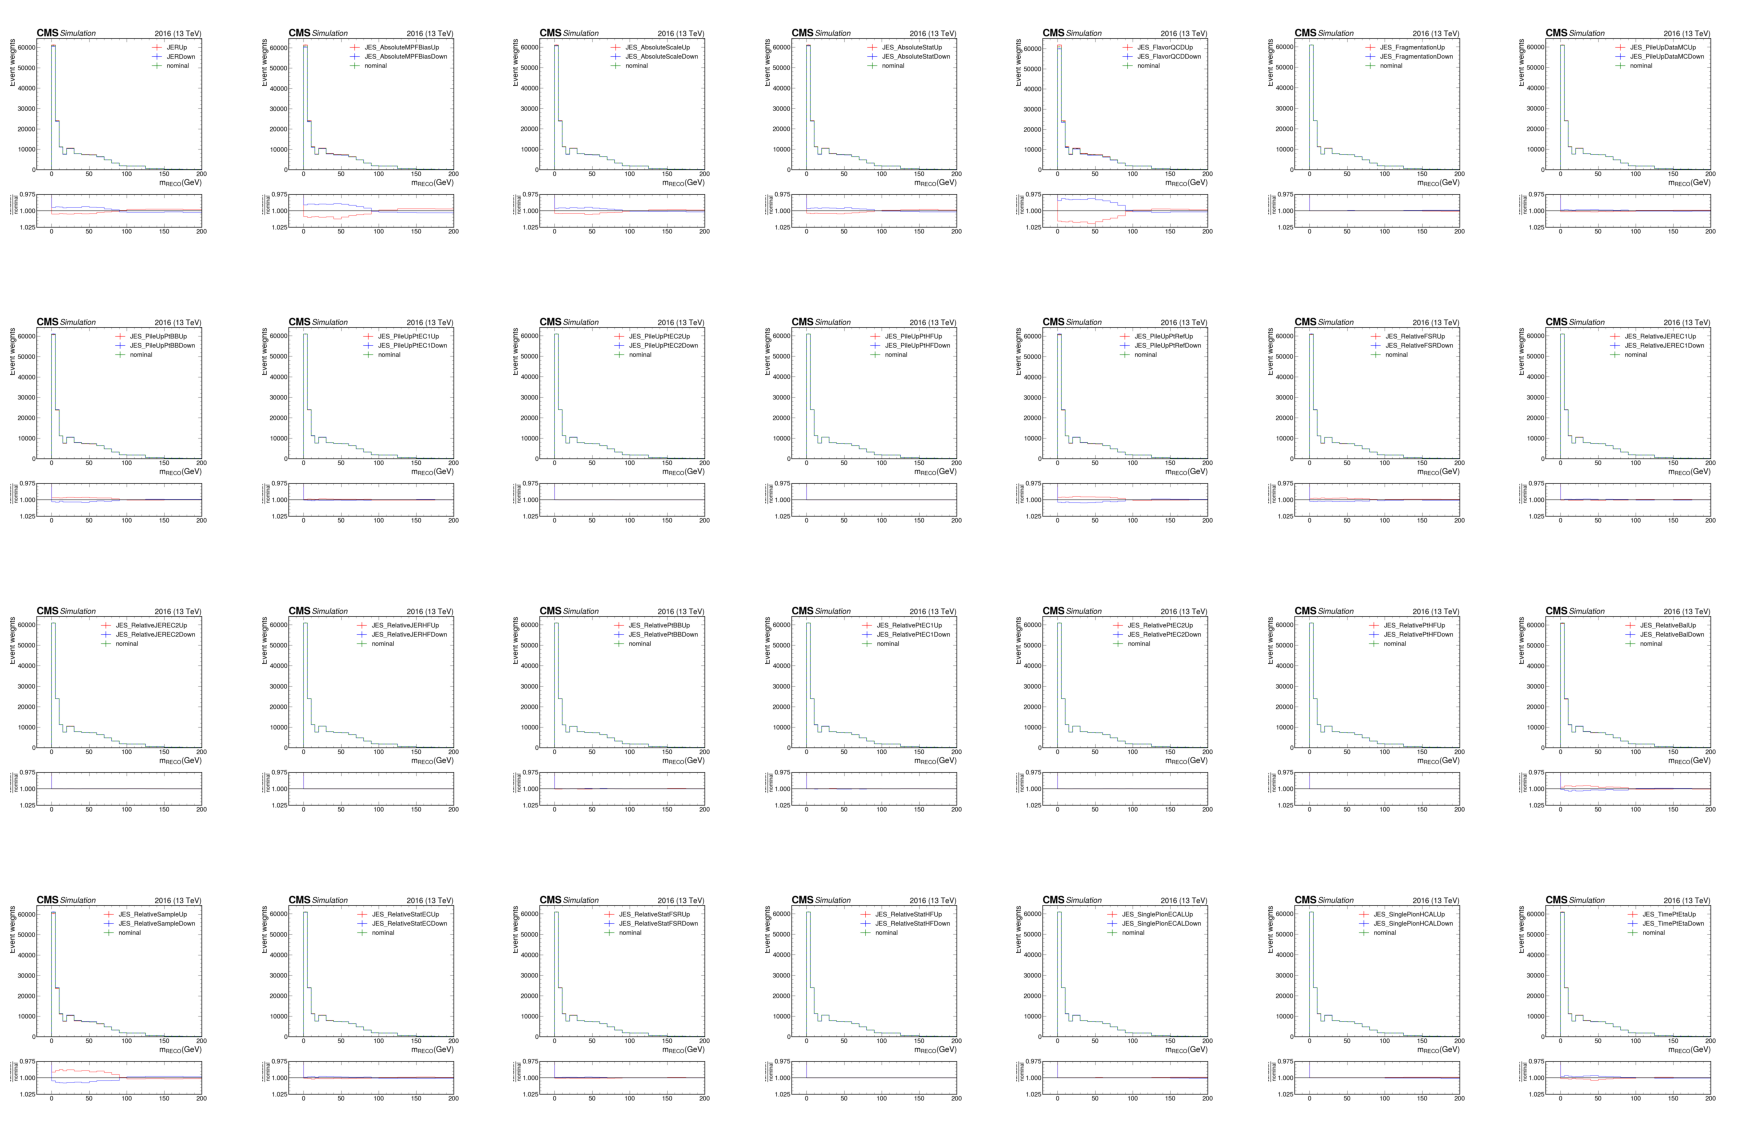

In [66]:
import matplotlib.image as mpimg

year = 2016
variable = "mreco"
# Replace with the actual paths to your 28 images
image_paths = ["plots/{}/jet_syst/{}_{}_{}.png".format(year, year, variable, syst) for syst in syst_list ]

# Create a figure and a subplot with 5 rows and 6 columns
fig, axs = plt.subplots(4, 7, figsize=(18, 12))  # Adjust figsize as needed

# Load and display each image in the grid
for i, ax in enumerate(axs.flat):
    image = mpimg.imread(image_paths[i])
    ax.imshow(image)
    ax.axis('off')
    if i == len(image_paths)-1:
        break

    
# Adjust spacing between images
plt.tight_layout()
plt.savefig("plots/{}/jet_syst/{}_{}_all.png".format(year, year, variable), dpi = 300)
# Show the plot
plt.show()

In [52]:
year = 2016
variable = "mreco"
image_paths = ["plots/{}/jet_syst/{}_{}.png".format(year, variable, syst) for syst in syst_list ]

In [59]:
with open("qjetmass_zjets_gen_UL17NanoAODv9_all_syst.pkl", "rb") as f:
    output = pickle.load( f )

In [62]:
a = output['response_matrix_u'][{'systematic':'nominal'}].project('mreco').values()
b = np.sum(output['response_matrix_u'][{'systematic':'nominal'}].project('mreco', 'ptreco', 'mgen', 'ptgen').values(), axis = (1,2,3))

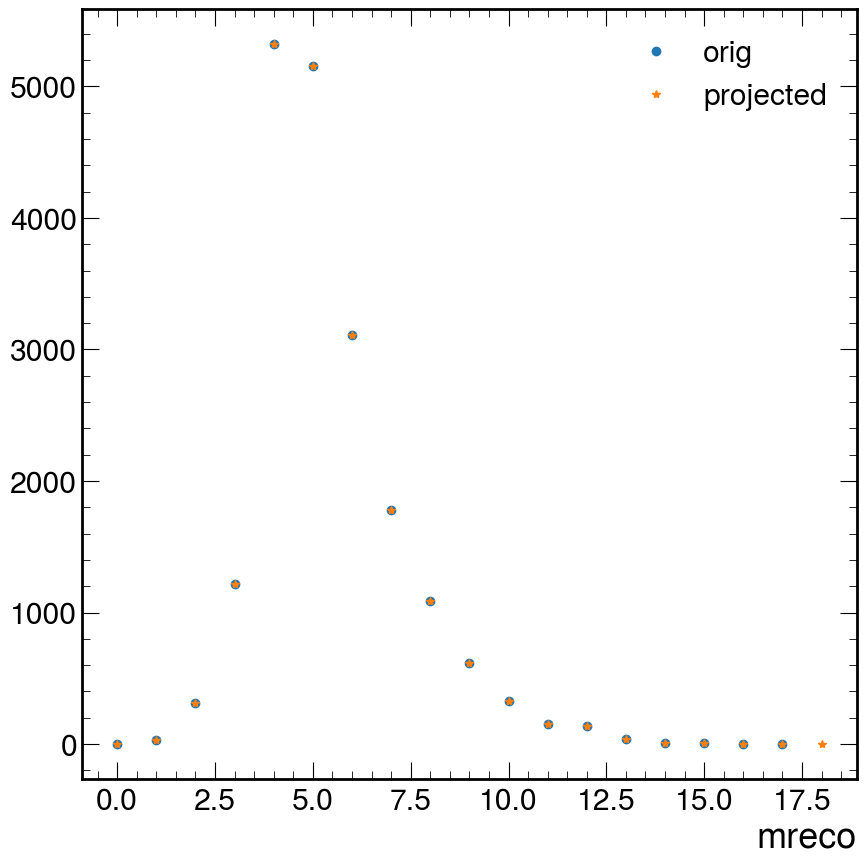

In [64]:
plt.plot(a, marker = 'o', linewidth = 0, label = 'orig')
plt.plot(b[1:27], marker = '*', linewidth = 0, label = 'projected')
plt.xlabel('mreco')
plt.legend()

<ErrorbarContainer object of 3 artists>

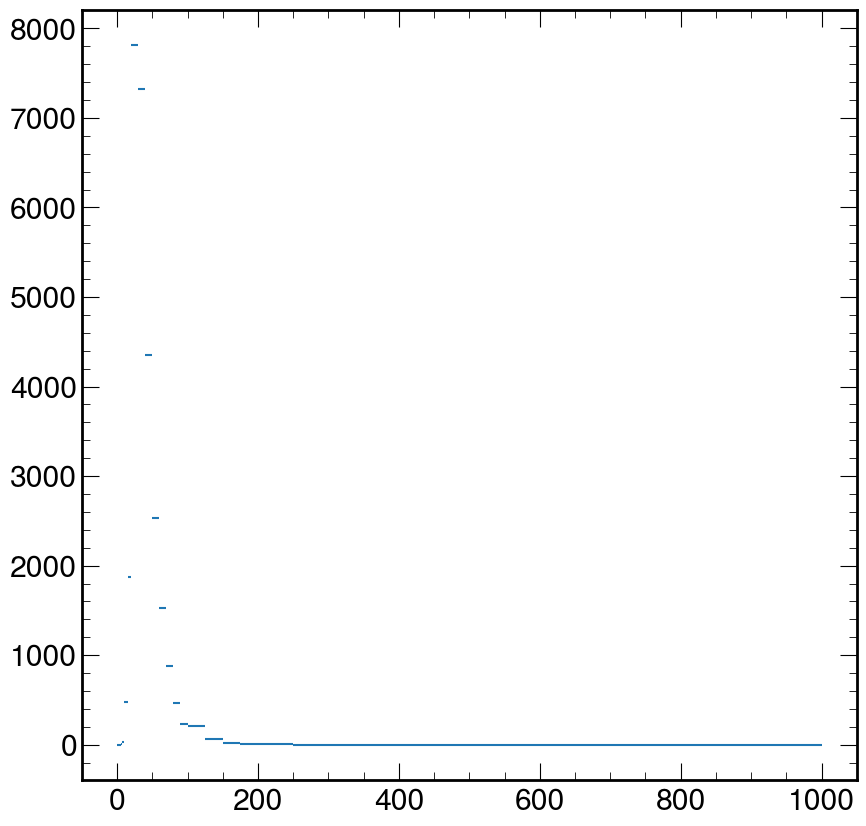

In [55]:
## Input uncertainty plot
variable = "mreco"
h = output['response_matrix_u'][{"systematic":"nominal"}].project(variable)
center = h.axes[0].centers
binwidth = h.axes[0].widths
binerror = binwidth/2
values = h.values()
errors = np.sqrt(h.variances())


plt.errorbar(center, values, None, binerror, ls = 'none')


array([   60.,    90.,   110.,    90.,   100.,   110., 12240.])

In [42]:
?plt.errorbar

Signature:
plt.errorbar(
    x: 'float | ArrayLike',
    y: 'float | ArrayLike',
    yerr: 'float | ArrayLike | None' = None,
    xerr: 'float | ArrayLike | None' = None,
    fmt: 'str' = '',
    ecolor: 'ColorType | None' = None,
    elinewidth: 'float | None' = None,
    capsize: 'float | None' = None,
    barsabove: 'bool' = False,
    lolims: 'bool | ArrayLike' = False,
    uplims: 'bool | ArrayLike' = False,
    xlolims: 'bool | ArrayLike' = False,
    xuplims: 'bool | ArrayLike' = False,
    errorevery: 'int | tuple[int, int]' = 1,
    capthick: 'float | None' = None,
    *,
    data=None,
    **kwargs,
) -> 'ErrorbarContainer'
Docstring:
Plot y versus x as lines and/or markers with attached errorbars.

*x*, *y* define the data locations, *xerr*, *yerr* define the errorbar
sizes. By default, this draws the data markers/lines as well the
errorbars. Use fmt='none' to draw errorbars without any data markers.

.. versionadded:: 3.7
   Caps and error lines are drawn in polar coordinat